In [52]:
###################################################################################################################
#The TS Advisor Dataset 6.0
#==================================================================================================================
############### Team 6A ###########################################################################################
#Tuheen Ahmmed, Arti Dilip Nanote, Varun Anand, Oswaldo Sanchez Santiago
###############June 29, 2024 ######################################################################################
#The TS Advisor dataset consists of two files 4G5G_trr_trs_20000_MHO_Groups.json and 4G5G_trr_trs_20000.csv.zip.

#The 4G5G_trs_15500.csv.zip contains a CSV file with 22293 Trouble Reports (TRs) extracted from 
#the 4G5G system (including Radio). More information about TR's and the MHWeb TR tool is available here: https://mhweb.ericsson.se/

#The JSON file consists of a mapping table from the 'Faulty product.Design Responsible MHO' field in the 4G5G_trr_trs_20000.csv 
#file to a derived field which we can call 'subsystem'. 
#Using the JSON file we can group the 222 labels in the 'Faulty product.Design Responsible MHO' field 
#into 33 subsystems instead. In this way, if we want to treat the TS Advisor project as a classification task, 
#it is easier to build a classifier for it since we will have more observations per label.
####################################################################################################################

In [1]:
import pandas as pd
import zipfile
import csv
import json

import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# max rows and columns##
pd.set_option('display.max_rows', None)

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

#confusion matrix#
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay

#######ROC########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

#####P-R curve ####

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

########## plotpy #######
#import plotly_express as px
#import plotly.graph_objects as go

In [2]:
###### Load the CSV file ######
csv_file_path = '4G5G_trr_trs_20000_1.csv'
df_tr33 = pd.read_csv(csv_file_path, low_memory=False)


In [3]:
df_tr33.shape

(22293, 38)

In [5]:
# Print the columns of the DataFrame
print("Columns in the DataFrame:")
print(df_tr33.columns)

Columns in the DataFrame:
Index(['General.Eriref', 'Faulty product.Design Responsible MHO',
       'General.Submitter priority', 'General.Heading',
       'Observation.Observation', 'Answer.Answer', 'General.Is duplicate TR',
       'General.Primary TR', 'General.Duplicate TRs',
       'TR History Register.Register date', 'General.Superior MHO',
       'General.Status code', 'Observation.Fault type', 'Analysis.Fault type',
       'Improvement.Type explanation', 'Network level.Product no',
       'Network level.Product no & R-State', 'Node level.Product no',
       'Node level.Product no & R-State', 'Node component level.Product no',
       'Node component level.Product no & R-State',
       'Faulty product.Product no', 'Faulty product.Product no & R-State',
       'Faulty product.Original Product no',
       'Faulty product.Original Product no & R-State',
       'Faulty product.Feature Product no',
       'Faulty product.Feature Product no & R-State', 'Registered',
       'to_radionode

In [6]:
# Display a summary of the DataFrame
print("\nSummary of the DataFrame:")
print(df_tr33.info())


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   General.Eriref                                22293 non-null  object 
 1   Faulty product.Design Responsible MHO         22293 non-null  object 
 2   General.Submitter priority                    22293 non-null  object 
 3   General.Heading                               22293 non-null  object 
 4   Observation.Observation                       22283 non-null  object 
 5   Answer.Answer                                 22257 non-null  object 
 6   General.Is duplicate TR                       22293 non-null  bool   
 7   General.Primary TR                            3306 non-null   object 
 8   General.Duplicate TRs                         5019 non-null   object 
 9   TR History Register.Register date 

In [7]:
# Count the number of empty (NaN) values in the 'Faulty product.Design Responsible MHO' column
num_empty_values = df_tr33['Faulty product.Design Responsible MHO'].isnull().sum()
print(f"Number of empty values in 'Faulty product.Design Responsible MHO': {num_empty_values}")

Number of empty values in 'Faulty product.Design Responsible MHO': 0


In [8]:
# Number of unique values
num_unique_values = df_tr33["Faulty product.Design Responsible MHO"].nunique()
print(f"Number of unique values in 'Faulty product.Design Responsible MHO': {num_unique_values}")

Number of unique values in 'Faulty product.Design Responsible MHO': 222


In [9]:
# Unique values
unique_values = df_tr33["Faulty product.Design Responsible MHO"].unique()
print(f"Unique values in 'Faulty product.Design Responsible MHO': {unique_values}")

Unique values in 'Faulty product.Design Responsible MHO': ['RCS-DEV' 'CAT-IPT' 'RADIOSW' 'TCSW-SECTCA' 'LTE-UPCDL' 'TCSW-CELL'
 'CAT-CRA' 'RADIOTRXCTL' 'TCSW-ENB' 'LFTSWMT' 'TCSW-UE' 'CAT-APC'
 'NR-UPC-DL' 'LTE-UPCUL' 'LTE-OAM' 'UCTOOL-V2' 'TC-SW' 'NR-ULPHY-A'
 'TTRD-TST' 'G2-GRAT' 'LTE-UEH' 'LMR-LRH' 'CAT-EMCLI' 'CAT-ANTSYS'
 'NR-UPC-UL' 'NR-DRACTRL' 'LTE-UEHNB' 'RU-RICR' 'LTE-RBS-CPI'
 '5RABBG3-KI1' 'NR-SYSTEM' 'LMR-RNH' 'RU-XCS' 'TCSW-PP' '5NRTDD-CD5'
 'NR-EMCASW' 'LTE-SYSTEM' 'CAT-TRRC' 'BBI-BBISW' 'LTE-BBSW' 'TCSW-NWIF'
 'DIGFPGA-G2' 'LTESIM' 'NR-EMCASW-A' 'LMR-PDCP' 'CAT-UC' 'NR-RPT'
 'TCSW-CTRL' 'CAT-RRC' 'NR-ULPHY' 'NR-DLPHY' 'CAT-IC' '5AASG3T-KI1'
 'LTE-ULL1' 'G2-WRAT' 'NR-DLPHY-A' 'NR-UPC-DL-A' 'LTE-MAC' 'CAT-NC'
 'TCSW-CONFIG' 'LTE-EQM' 'CAT-FMWK' 'LTE-DLL1' 'CPP-IPOM' 'LTE-TOOLS'
 '5AASG2T-BJ5' 'LTE-BFC' '5AASG2T-BJ2' 'CSIM-BASE' 'CAT-XMU03'
 'NR-BBPCBBCC' 'RBS-SYS' 'CSIM-FSUE' 'TCSW-RP-RCC' 'NR-RCC-BB'
 'BB6620&30HW' 'CAT-ULSA' 'TN-SW' 'RDSRAHW2' 'LMRLFTSW' '6000DU-G2'
 'C

In [10]:
# Load the JSON file
json_file_path = '4G5G_trr_trs_20000_MHO_Groups.json'
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)


In [11]:
# Extract only the top-level keys from the JSON file
top_level_keys = list(json_data.keys())

# Count the top-level keys
top_level_keys_count = len(top_level_keys)
print(f"Number of top-level keys: {top_level_keys_count}")

Number of top-level keys: 18


In [12]:
top_level_keys

['BBI-BBISW',
 'CAT-SW',
 'CPI',
 'CPP-PLM',
 'G2-GRAT',
 'G2-WRAT',
 'Hardware',
 'LTE-BBSW',
 'LTE-TCSW',
 'LTE-TOOLS',
 'NR-EMCASW',
 'NR-EMCASW-A',
 'NR-SYSTEM',
 'RADIOSW',
 'RCS-DEV',
 'TC-SW',
 'TN-SW',
 'W-CABVEMAS']

In [13]:
################################################################################################
##############Create a new column in the DataFrame to store the higher-level JSON keys##########
###########KEY_MHO will be our y to plug in a model ############################################
################## it will yield 18 top keys as ################################################
##############If no match is found, keep the value as None######################################

df_tr33['KEY_MHO'] = None

# Iterate over each row in the DataFrame
for row in range(df_tr33.shape[0]):
    # Get the value from the 'Faulty product.Design Responsible MHO' column
    design_mho_value = df_tr33.iloc[row]['Faulty product.Design Responsible MHO']
    value = None

    # Check for a match in the higher-level keys of the JSON data
    for key, subkeys in json_data.items():
        if design_mho_value == key:
            value = key
            break
        elif design_mho_value in subkeys:
            value = key
            break
    
    # If no match is found, keep the value as None
    df_tr33.at[row, 'KEY_MHO'] = value


In [14]:
empty_cells_count = df_tr33['KEY_MHO'].isna().sum()
empty_cells_count

424

In [18]:
# Find the rows where 'KEY_MHO' is None
empty_key_mho_rows = df_tr33['KEY_MHO'].isna()

# Print the rows with empty 'KEY_MHO' cells
#print(empty_key_mho_rows)
empty_key_mho_rows.head()

0    False
1    False
2    False
3    False
4    False
Name: KEY_MHO, dtype: bool

In [19]:
############## keeping the same MHO name if there is missing name in Jason file#####
#################### this is the way data owner said and we will end up with #######
######################33 targets and this KEY_MHO1 we will use in our rest #########
######################## of the code ###############################################

df_tr33['KEY_MHO1'] = None

# Iterate over each row in the DataFrame
for row in range(df_tr33.shape[0]):
    # Get the value from the 'Faulty product.Design Responsible MHO' column
    design_mho_value = df_tr33.iloc[row]['Faulty product.Design Responsible MHO']
    value = None

    # Check for a match in the higher-level keys of the JSON data
    for key, subkeys in json_data.items():
        if design_mho_value == key:
            value = key
            break
        elif design_mho_value in subkeys:
            value = key
            break
    
    # If no match is found, keep the original value
    df_tr33.at[row, 'KEY_MHO1'] = value if value is not None else design_mho_value

# Print rows where 'KEY_MHO' is the same as the original 'Faulty product.Design Responsible MHO'
print(df_tr33[df_tr33['KEY_MHO1'] == df_tr33['Faulty product.Design Responsible MHO']])


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [23]:
#df_tr33['KEY_MHO']
df_tr33['KEY_MHO1'].unique().sum()
df_tr33['KEY_MHO1'].value_counts()


KEY_MHO1
LTE-BBSW       4017
LTE-TCSW       3925
CAT-SW         3139
TC-SW          2592
RADIOSW        2234
NR-EMCASW      1678
RCS-DEV        1132
BBI-BBISW       594
Hardware        555
NR-EMCASW-A     509
CPI             360
G2-WRAT         260
TN-SW           249
CPP-PLM         218
G2-GRAT         170
LTE-TOOLS       119
NR-SYSTEM       118
RBS-SYS         113
RADIONODE       101
LTE-SYSTEM       60
TTRD-TST         49
LMIR7-BASIC      19
BTS-SW-DES       17
GTE-CORE         13
CSIM-FSUE        12
FSUE-DNURP        9
NR-BBPCBBCC       8
CSIM-BASE         6
LMR-CIRV          5
ENM-CM            4
EAB-SGSN-DM       4
TSL-DEV           2
ENM-AMOS          2
Name: count, dtype: int64

In [24]:
# Display the updated DataFrame with the new 'KEY_MHO' column
#print(df_tr.head())
df_tr33['KEY_MHO1'].unique().sum()



'RCS-DEVCAT-SWRADIOSWTC-SWLTE-BBSWNR-EMCASWLTE-TCSWNR-EMCASW-ATTRD-TSTG2-GRATCPIHardwareNR-SYSTEMLTE-SYSTEMBBI-BBISWG2-WRATCPP-PLMLTE-TOOLSCSIM-BASENR-BBPCBBCCRBS-SYSCSIM-FSUETN-SWRADIONODETSL-DEVGTE-COREBTS-SW-DESFSUE-DNURPENM-CMENM-AMOSLMIR7-BASICEAB-SGSN-DMLMR-CIRV'

In [25]:
# Count the unique values in 'KEY_MHO1'
unique_counts = df_tr33['KEY_MHO1'].value_counts()

# Sum the counts of unique values
total_unique_count = unique_counts.sum()

print(f"Total unique count: {total_unique_count}")

Total unique count: 22293


In [26]:
# Calculate the number of unique values in 'KEY_MHO1'
unique_count = df_tr33['KEY_MHO1'].nunique()

print(f"Number of unique values in 'KEY_MHO1': {unique_count}")


Number of unique values in 'KEY_MHO1': 33


In [27]:
df_tr33.head(10)

,General.Eriref,Faulty product.Design Responsible MHO,General.Submitter priority,General.Heading,Observation.Observation,Answer.Answer,General.Is duplicate TR,General.Primary TR,General.Duplicate TRs,TR History Register.Register date,...,Before_last_assign,Accept_or_Cancelled,routing_time,routing_waiting_time,total_routing_time,total_time,General.Status explanation,routed,KEY_MHO,KEY_MHO1
0,HZ38812,RCS-DEV,B,Emergency Unlock does not unlock the capacitie...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-09-02,...,2021-09-10 - 16:52:40,2021-09-16 - 08:16:07,1354.916667,1354.916667,11872.100000,19995.550000,Finished,False,RCS-DEV,RCS-DEV
1,HZ38535,CAT-IPT,B,MB G2 Mixed Mode C2 - Alarm Resource Activatio...,1 E F F E C T\n============\n1.1 Trouble summa...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-09-01,...,2021-10-08 - 06:42:39,2021-10-08 - 06:53:41,1344.466667,1.800000,53164.383333,53175.416667,Finished,True,CAT-SW,CAT-SW
2,HZ38006,RADIOSW,A,MR8384 DOT4455 FFI:IRU1649 SW error alarm and ...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,HZ39141,2021-08-28,...,2021-09-10 - 08:08:41,2021-09-10 - 08:10:10,3.400000,3.400000,18812.016667,18813.500000,Finished,True,RADIOSW,RADIOSW
3,HZ37845,TCSW-SECTCA,B,RGW SP035: One NR SC & Cell (ESS paired) in un...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-08-27,...,2021-09-02 - 07:39:00,2021-09-06 - 17:38:02,7297.650000,7121.633333,8621.983333,14981.016667,Finished,False,TC-SW,TC-SW
4,HZ37761,LTE-UPCDL,A,"21.Q2 IP3 EC1 site stop taking traffic, paging...",1 E F F E C T \n============\n1.1 Trouble s...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-08-26,...,2021-10-04 - 07:29:38,2021-11-01 - 17:24:29,160.200000,160.200000,55755.300000,96670.150000,Finished,False,LTE-BBSW,LTE-BBSW
5,HZ37627,TCSW-SECTCA,B,<NBV G2 NRHB>SectorCarrier isn't accessible wi...,STP :selnitstp00043\nTC: RBSNC_AasDataUpdateC...,CAUSE OF FAULT\n------------------------------...,False,NaN,HZ37780,2021-08-26,...,2021-09-14 - 12:42:30,2021-09-14 - 13:42:58,88.300000,4.433333,27661.866667,27722.333333,Finished,True,TC-SW,TC-SW
6,HZ37627,TCSW-SECTCA,B,<NBV G2 NRHB>SectorCarrier isn't accessible wi...,STP :selnitstp00043\nTC: RBSNC_AasDataUpdateC...,CAUSE OF FAULT\n------------------------------...,False,NaN,HZ38391,2021-08-26,...,2021-09-14 - 12:42:30,2021-09-14 - 13:42:58,88.300000,4.433333,27661.866667,27722.333333,Finished,True,TC-SW,TC-SW
7,HZ37627,TCSW-SECTCA,B,<NBV G2 NRHB>SectorCarrier isn't accessible wi...,STP :selnitstp00043\nTC: RBSNC_AasDataUpdateC...,CAUSE OF FAULT\n------------------------------...,False,NaN,HZ39457,2021-08-26,...,2021-09-14 - 12:42:30,2021-09-14 - 13:42:58,88.300000,4.433333,27661.866667,27722.333333,Finished,True,TC-SW,TC-SW
8,HZ37627,TCSW-SECTCA,B,<NBV G2 NRHB>SectorCarrier isn't accessible wi...,STP :selnitstp00043\nTC: RBSNC_AasDataUpdateC...,CAUSE OF FAULT\n------------------------------...,False,NaN,HZ41042,2021-08-26,...,2021-09-14 - 12:42:30,2021-09-14 - 13:42:58,88.300000,4.433333,27661.866667,27722.333333,Finished,True,TC-SW,TC-SW
9,HZ37627,TCSW-SECTCA,B,<NBV G2 NRHB>SectorCarrier isn't accessible wi...,STP :selnitstp00043\nTC: RBSNC_AasDataUpdateC...,CAUSE OF FAULT\n------------------------------...,False,NaN,HZ37945,2021-08-26,...,2021-09-14 - 12:42:30,2021-09-14 - 13:42:58,88.300000,4.433333,27661.866667,27722.333333,Finished,True,TC-SW,TC-SW


In [28]:
df_tr33.tail(10)

,General.Eriref,Faulty product.Design Responsible MHO,General.Submitter priority,General.Heading,Observation.Observation,Answer.Answer,General.Is duplicate TR,General.Primary TR,General.Duplicate TRs,TR History Register.Register date,...,Before_last_assign,Accept_or_Cancelled,routing_time,routing_waiting_time,total_routing_time,total_time,General.Status explanation,routed,KEY_MHO,KEY_MHO1
22283,HW33029,TN-SW,A,PMD CRASH for tnrh program,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,HW33198,2017-10-02,...,2017-10-03 - 16:00:45,2017-10-09 - 03:16:40,1347.783333,244.783333,1855.383333,9731.300000,Finished,False,TN-SW,TN-SW
22284,HW33029,TN-SW,A,PMD CRASH for tnrh program,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,HW33153,2017-10-02,...,2017-10-03 - 16:00:45,2017-10-09 - 03:16:40,1347.783333,244.783333,1855.383333,9731.300000,Finished,False,TN-SW,TN-SW
22285,HW33056,LTE-DLL1,A,ULMA[00768]:CMC supervision mail received Ille...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2017-10-02,...,2017-10-09 - 10:51:34,2017-10-09 - 12:12:04,736.416667,254.850000,10166.250000,10246.750000,Finished,False,LTE-BBSW,LTE-BBSW
22286,HW33070,LTEFPGA-CBC,A,IQC message - CCA_INFO_IND missing from Radio ...,"Upon running LAA 4CC (1 Pcell + 3 LAA Scells),...",SOLUTION/ANSWER AND MOTIVATION (IN BRIEF)\n===...,False,NaN,NaN,2017-10-02,...,2017-12-04 - 09:40:36,2017-12-12 - 08:29:36,15889.583333,221.116667,90731.516667,102180.516667,Finished,False,Hardware,Hardware
22287,HW33081,LTE-UPCUL,B,PIRCAP_L17B_G1_[Dsp Restart] ULMA[00768]:CMC s...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,True,HW33151,NaN,2017-10-02,...,2017-10-03 - 11:18:52,2017-10-12 - 14:50:15,700.433333,184.950000,1513.550000,14684.933333,Finished,False,LTE-BBSW,LTE-BBSW
22288,HW33087,CAT-NC,C,Unexpected value of attribute RiPort::transmis...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2017-10-02,...,2017-10-05 - 10:35:17,2017-10-05 - 10:44:07,1238.200000,1176.733333,4291.883333,4300.716667,Finished,False,CAT-SW,CAT-SW
22289,HW33096,RU-RICR,B,HRICR nci_control.c:1155 ERROR:Jitter Buffer d...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2017-10-02,...,2017-11-17 - 08:57:38,2017-12-12 - 15:52:17,2582.183333,1276.283333,66078.800000,102493.450000,Finished,False,RADIOSW,RADIOSW
22290,HW33129,CBA-COM,C,pmd-com Program crash during testing robustnes...,1 E F F E C T \n============\n1.1\tTrouble sum...,Problem:\n=======\nCrash is caused due to a bu...,False,NaN,NaN,2017-10-02,...,2017-11-29 - 15:07:10,2017-11-29 - 15:33:27,1042.383333,1042.383333,83629.366667,83655.650000,Finished,False,RCS-DEV,RCS-DEV
22291,HW33181,LTESIM,C,MR3781-18LTE12NB6CatM-crash and all FDD cells'...,1 E F F E C T \n============\n1.1 Trouble summ...,1. Describe the solution from a system/test pe...,False,NaN,NaN,2017-10-02,...,2018-03-16 - 15:44:26,2018-05-15 - 23:00:39,875.416667,875.416667,237414.616667,324250.833333,Finished,False,LTE-BBSW,LTE-BBSW
22292,HW15752,6000DUS,B,CDTMOUS MTR17.27 Board restart rank=Coldwithte...,The first step is to ensure the following temp...,SOLUTION/ANSWER AND MOTIVATION (IN BRIEF)\n===...,False,NaN,NaN,2017-07-25,...,2017-10-12 - 06:26:07,2017-11-17 - 23:02:50,670.833333,670.833333,112913.966667,165750.683333,Finished,False,Hardware,Hardware


In [29]:
# Save the processed DataFrame to a new CSV file
df_tr33.to_csv('4G5G_trr_trs_20000_with_KEY_MHO1.csv', index=False)

In [30]:
import pandas as pd
# Load the DataFrame (assuming it has already been processed and 'KEY_MHO' column is added)
df_tr33 = pd.read_csv('4G5G_trr_trs_20000_with_KEY_MHO1.csv', low_memory=False)

# Count the number of unique values in the 'KEY_MHO' column
num_unique_values = df_tr33['KEY_MHO1'].nunique()
print(f"Number of unique values in 'KEY_MHO1': {num_unique_values}")

# Get the unique values in the 'KEY_MHO' column
unique_values = df_tr33['KEY_MHO1'].unique()
print("Unique values in 'KEY_MHO1':", unique_values)

# Count the frequency of each unique value in the 'KEY_MHO' column
value_counts = df_tr33['KEY_MHO1'].value_counts()
print("Frequency of each unique value in 'KEY_MHO1':")
print(value_counts)

Number of unique values in 'KEY_MHO1': 33
Unique values in 'KEY_MHO1': ['RCS-DEV' 'CAT-SW' 'RADIOSW' 'TC-SW' 'LTE-BBSW' 'NR-EMCASW' 'LTE-TCSW'
 'NR-EMCASW-A' 'TTRD-TST' 'G2-GRAT' 'CPI' 'Hardware' 'NR-SYSTEM'
 'LTE-SYSTEM' 'BBI-BBISW' 'G2-WRAT' 'CPP-PLM' 'LTE-TOOLS' 'CSIM-BASE'
 'NR-BBPCBBCC' 'RBS-SYS' 'CSIM-FSUE' 'TN-SW' 'RADIONODE' 'TSL-DEV'
 'GTE-CORE' 'BTS-SW-DES' 'FSUE-DNURP' 'ENM-CM' 'ENM-AMOS' 'LMIR7-BASIC'
 'EAB-SGSN-DM' 'LMR-CIRV']
Frequency of each unique value in 'KEY_MHO1':
KEY_MHO1
LTE-BBSW       4017
LTE-TCSW       3925
CAT-SW         3139
TC-SW          2592
RADIOSW        2234
NR-EMCASW      1678
RCS-DEV        1132
BBI-BBISW       594
Hardware        555
NR-EMCASW-A     509
CPI             360
G2-WRAT         260
TN-SW           249
CPP-PLM         218
G2-GRAT         170
LTE-TOOLS       119
NR-SYSTEM       118
RBS-SYS         113
RADIONODE       101
LTE-SYSTEM       60
TTRD-TST         49
LMIR7-BASIC      19
BTS-SW-DES       17
GTE-CORE         13
CSIM-FSUE        12
F

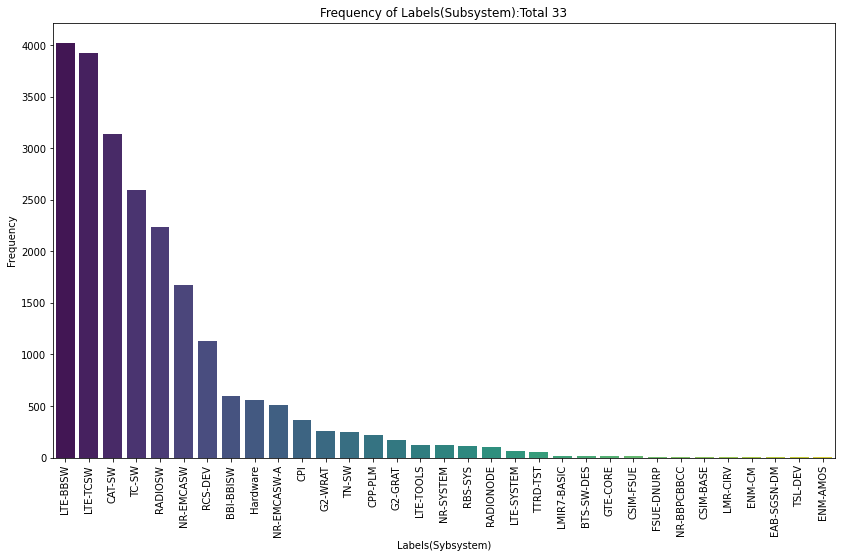

In [31]:
# Plot the frequency of each unique value in the 'KEY_MHO1' column
plt.figure(figsize=(14, 8))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Labels(Sybsystem)')
plt.ylabel('Frequency')
plt.title('Frequency of Labels(Subsystem):Total 33')
plt.show()

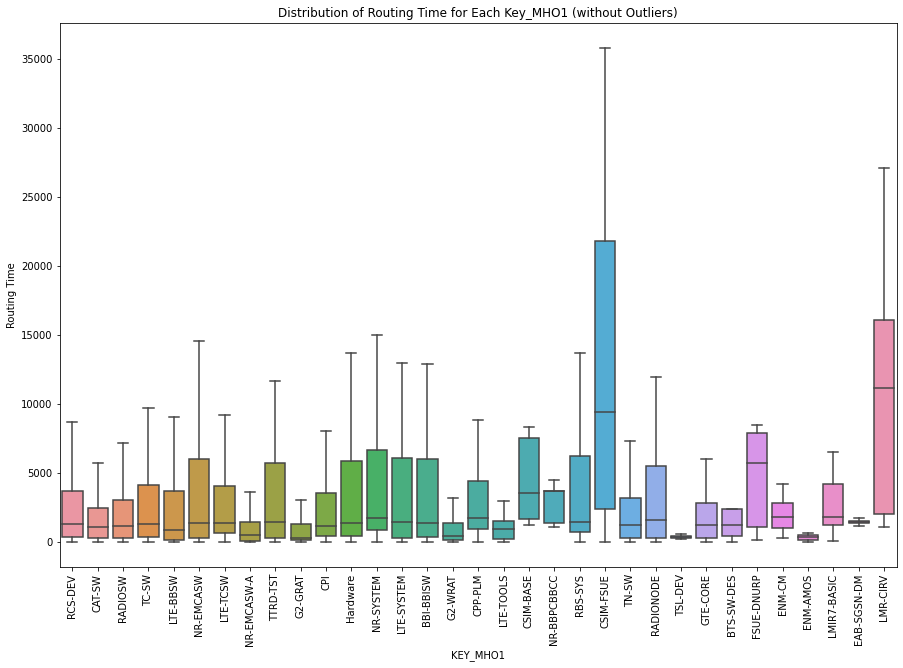

In [32]:
##########################################################################################################
####################### Distribution of Routing time of each Key_MHO01 without outliers ##################
##########################################################################################################

# Create a figure and a set of subplots
plt.figure(figsize=(15, 10))

# Use seaborn boxplot to visualize the distribution of 'routing_time' for each 'KEY_MHO1'
sns.boxplot(x='KEY_MHO1', y='routing_time', data=df_tr33, showfliers=False)  # Set showfliers=False to remove outliers

# Add title and labels
plt.title('Distribution of Routing Time for Each Key_MHO1 (without Outliers)')
plt.xlabel('KEY_MHO1')
plt.ylabel('Routing Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


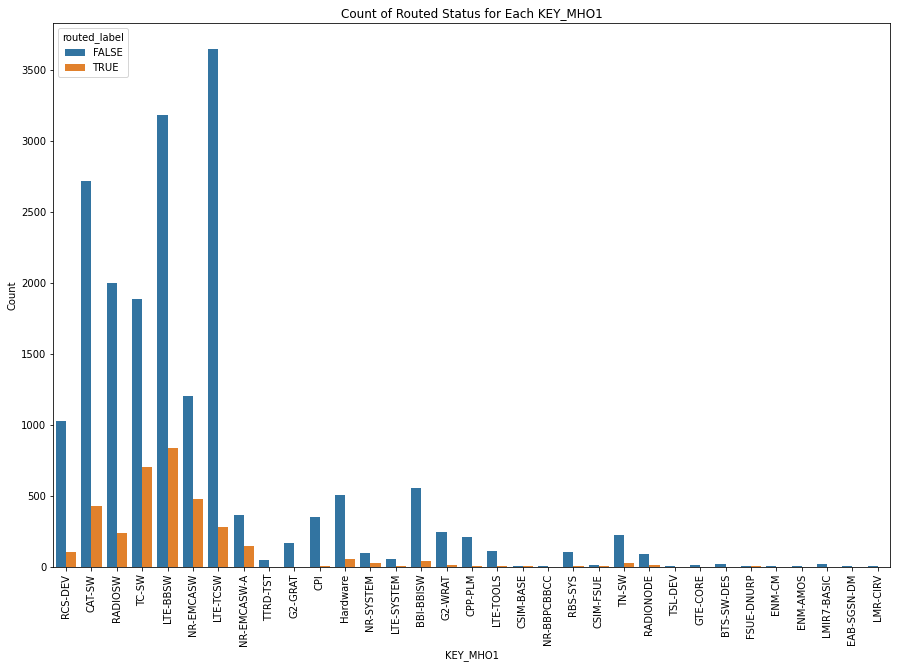

In [35]:
# Ensure 'routed' is boolean and then convert it to labeled values
df_tr33['routed_label'] = df_tr33['routed'].map({0: 'FALSE', 1: 'TRUE'})

# Plot the count of routed (FALSE or TRUE) for each KEY_MHO1
plt.figure(figsize=(15, 10))
sns.countplot(x='KEY_MHO1', hue='routed_label', data=df_tr33)

# Add title and labels
plt.title('Count of Routed Status for Each KEY_MHO1')
plt.xlabel('KEY_MHO1')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

Descriptive Statistics for Top 10 KEY_MHO1:
KEY_MHO1: BBI-BBISW
count      594.000000
mean      4119.237065
std       6287.869040
min          0.883333
25%        392.445833
50%       1369.775000
75%       5981.666667
max      67711.800000
Name: routing_time, dtype: float64

KEY_MHO1: CAT-SW
count      3139.000000
mean       2343.010571
std        5096.751000
min           0.000000
25%         283.491667
50%        1070.583333
75%        2474.175000
max      110482.350000
Name: routing_time, dtype: float64

KEY_MHO1: Hardware
count    5.550000e+02
mean     1.088685e+04
std      6.750313e+04
min      0.000000e+00
25%      4.573917e+02
50%      1.377450e+03
75%      5.855333e+03
max      1.500580e+06
Name: routing_time, dtype: float64

KEY_MHO1: LTE-BBSW
count      4017.000000
mean       3539.459812
std        9140.257662
min           0.000000
25%         138.750000
50%         881.683333
75%        3719.333333
max      181110.316667
Name: routing_time, dtype: float64

KEY_MHO1: LTE-TCS

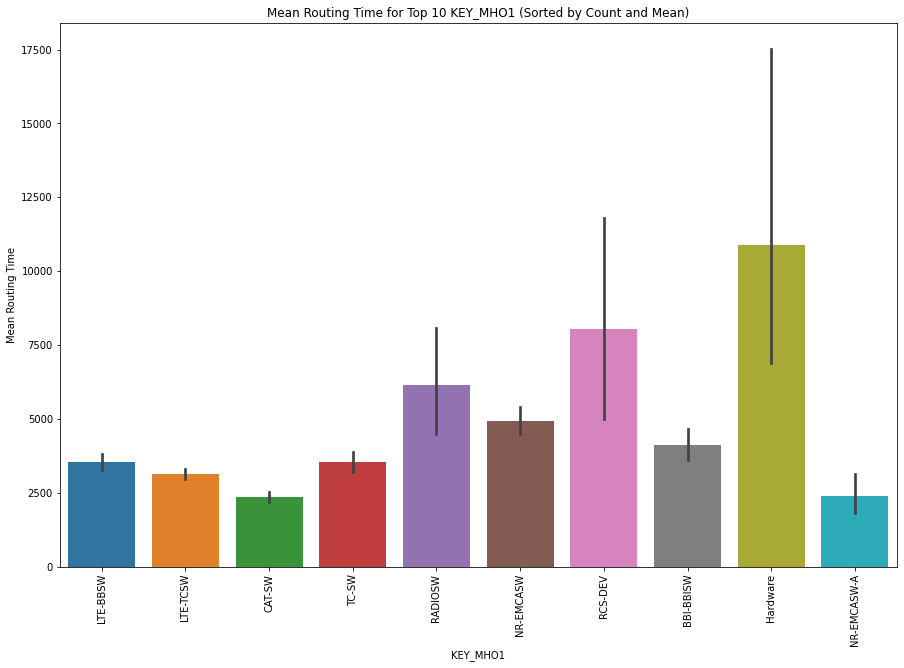

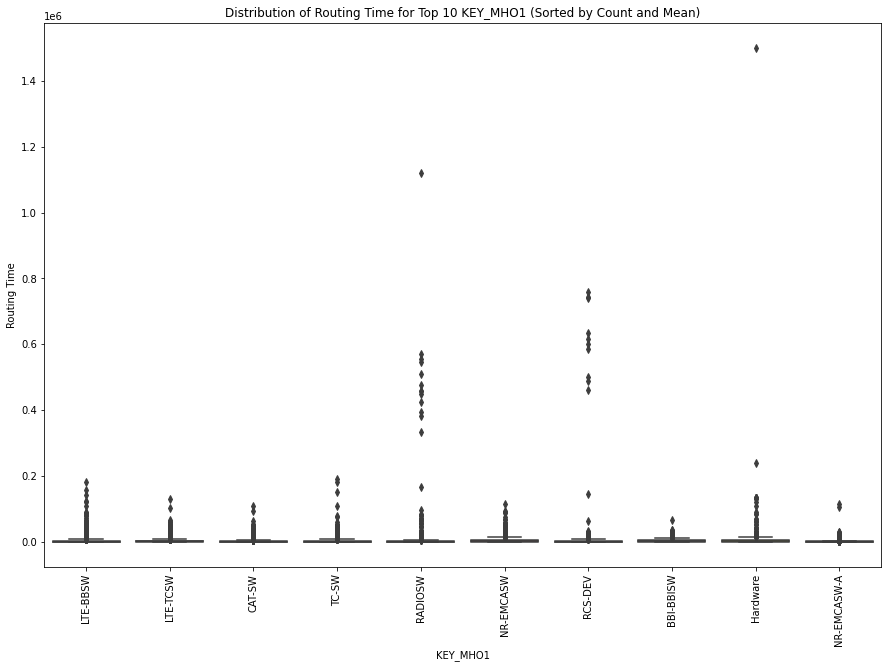

In [38]:
################### By Mean and Count of routing time ######################
####################Descriptive analysis####################################
############################################################################

# Calculate count and mean routing_time for each KEY_MHO1
stats = df_tr33.groupby('KEY_MHO1')['routing_time'].agg(['count', 'mean'])

# Sort by count and then by mean in descending order
stats_sorted = stats.sort_values(by=['count', 'mean'], ascending=False)

# Get top 10 KEY_MHO1 based on count and mean
top_10_routing_time = stats_sorted.head(10)

# Filter df_tr33 to include only the top 10 KEY_MHO1
df_top_10 = df_tr33[df_tr33['KEY_MHO1'].isin(top_10_routing_time.index)]

# Print descriptive statistics for the top 10 KEY_MHO1
print("Descriptive Statistics for Top 10 KEY_MHO1:")
for key_mho1, data in df_top_10.groupby('KEY_MHO1'):
    print(f"KEY_MHO1: {key_mho1}")
    print(data['routing_time'].describe())
    print()

# Plot mean routing_time for the top 10 KEY_MHO1
plt.figure(figsize=(15, 10))
sns.barplot(x='KEY_MHO1', y='routing_time', data=df_top_10, order=top_10_routing_time.index)
plt.title('Mean Routing Time for Top 10 KEY_MHO1 (Sorted by Count and Mean)')
plt.xlabel('KEY_MHO1')
plt.ylabel('Mean Routing Time')
plt.xticks(rotation=90)
plt.show()

# Plot box plots for the distribution of routing_time for the top 10 KEY_MHO1
plt.figure(figsize=(15, 10))
sns.boxplot(x='KEY_MHO1', y='routing_time', data=df_top_10, order=top_10_routing_time.index)
plt.title('Distribution of Routing Time for Top 10 KEY_MHO1 (Sorted by Count and Mean)')
plt.xlabel('KEY_MHO1')
plt.ylabel('Routing Time')
plt.xticks(rotation=90)
plt.show()


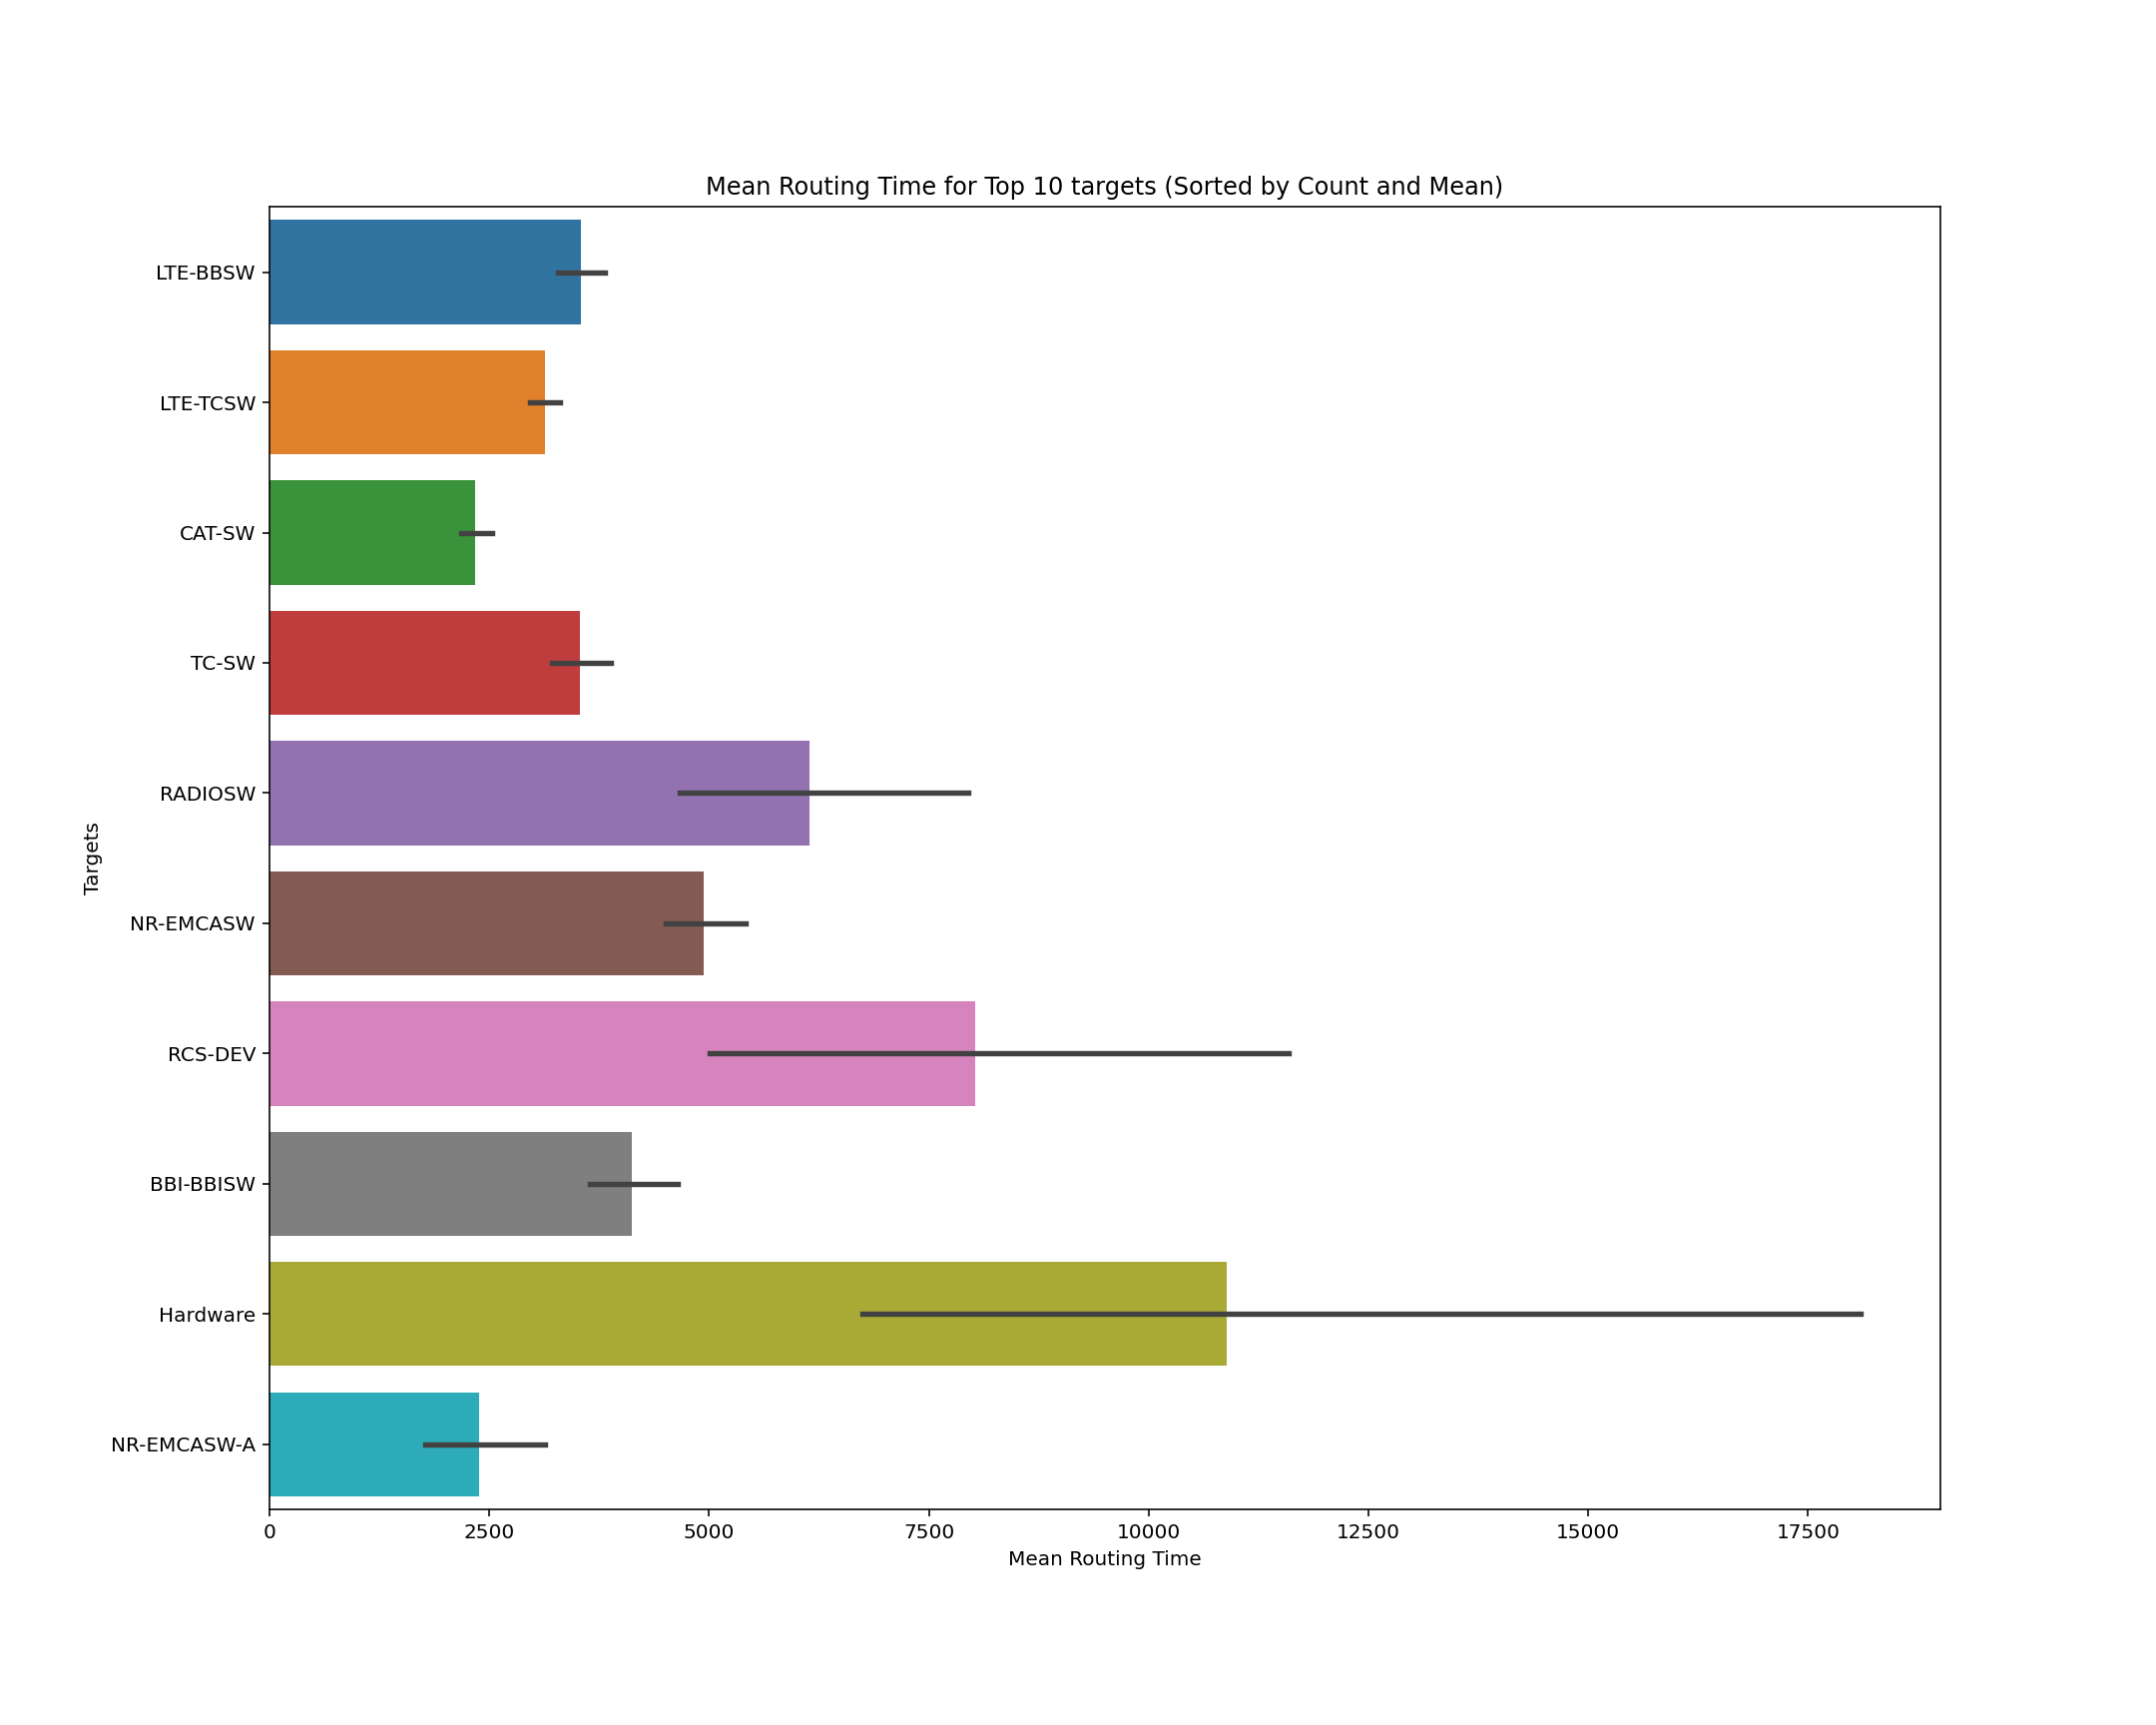

In [288]:

# Calculate count and mean routing_time for each KEY_MHO1
stats = df_tr33.groupby('KEY_MHO1')['routing_time'].agg(['count', 'mean'])

# Sort by count (highest to lowest) and then by mean within each count group
stats_sorted = stats.sort_values(by=['count', 'mean'], ascending=[False, True])

# Get top 10 KEY_MHO1 based on count and mean
top_10_routing_time = stats_sorted.head(10)

# Filter df_tr33 to include only the top 10 KEY_MHO1
df_top_10 = df_tr33[df_tr33['KEY_MHO1'].isin(top_10_routing_time.index)]

# Plot horizontally with seaborn barplot
plt.figure(figsize=(15, 12))  # Adjust the figure size as per your preference
sns.barplot(y='KEY_MHO1', x='routing_time', data=df_top_10, order=top_10_routing_time.index)
plt.title('Mean Routing Time for Top 10 targets (Sorted by Count and Mean)')
plt.xlabel('Mean Routing Time')
plt.ylabel('Targets')
plt.show()

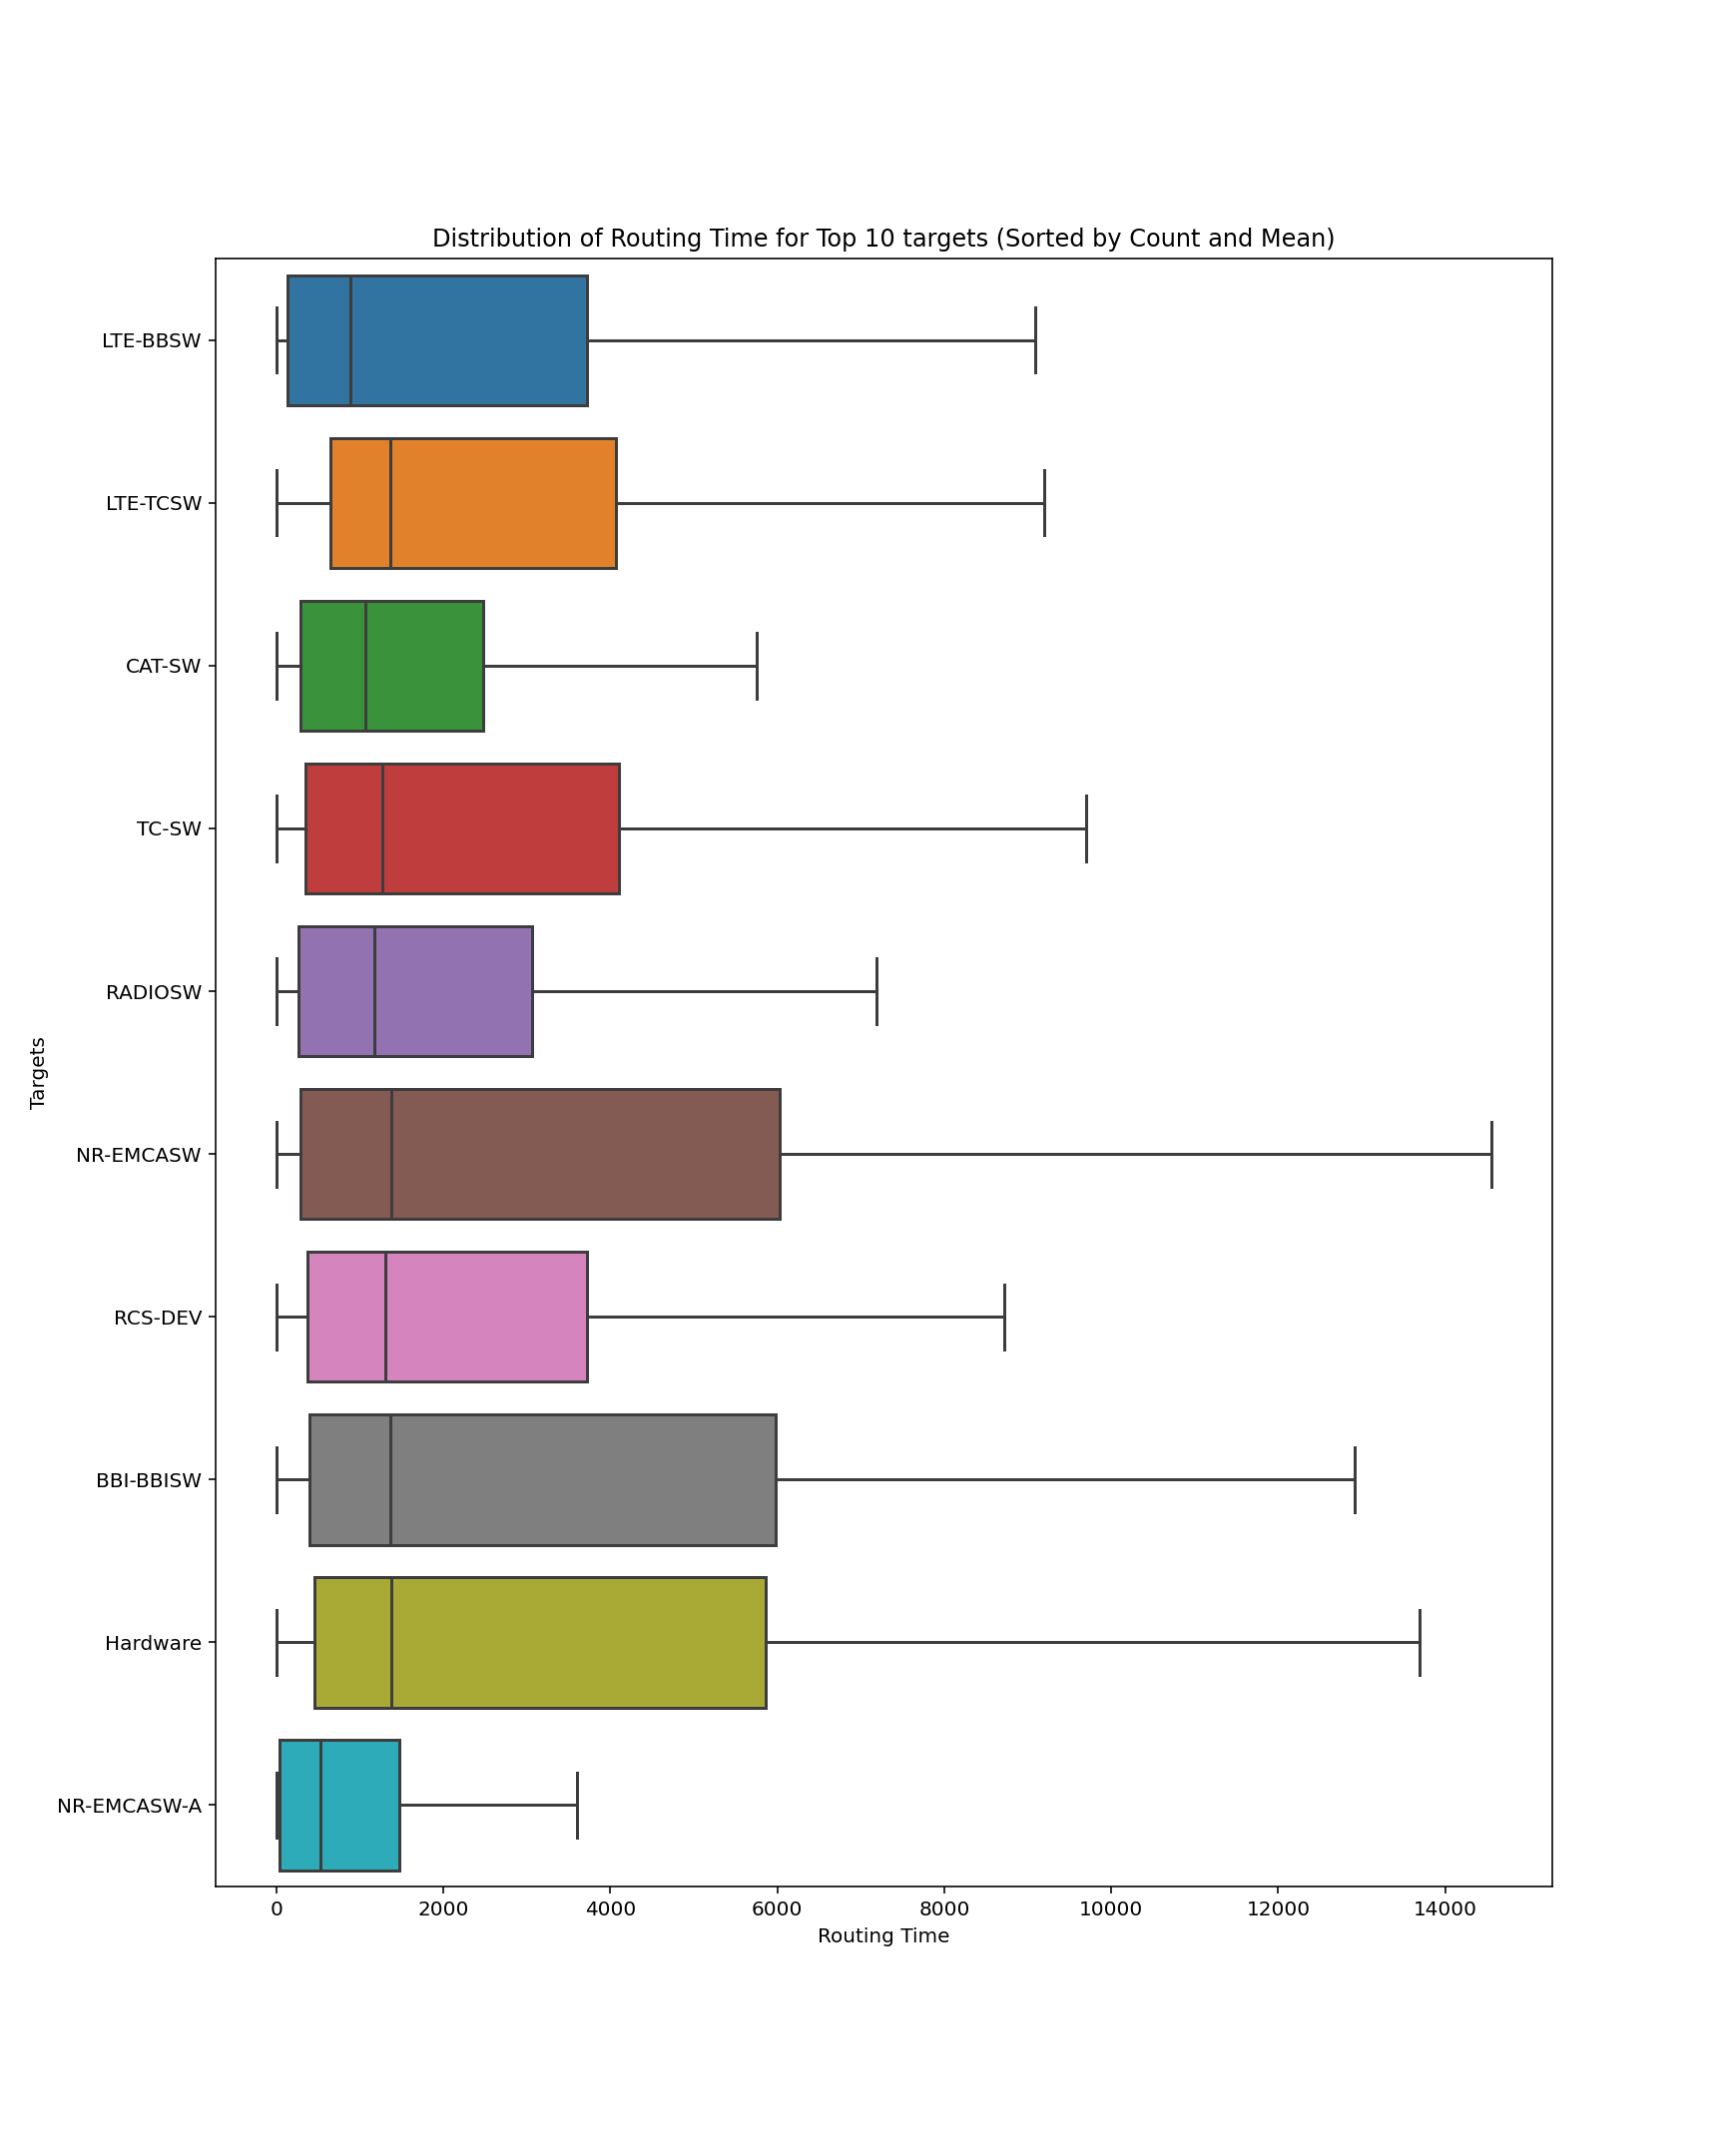

In [286]:
# Calculate count and mean routing_time for each KEY_MHO1
stats = df_tr33.groupby('KEY_MHO1')['routing_time'].agg(['count', 'mean'])

# Sort by count (highest to lowest) and then by mean within each count group
stats_sorted = stats.sort_values(by=['count', 'mean'], ascending=[False, True])

# Get top 10 KEY_MHO1 based on count and mean
top_10_routing_time = stats_sorted.head(10)

# Filter df_tr33 to include only the top 10 KEY_MHO1
df_top_10 = df_tr33[df_tr33['KEY_MHO1'].isin(top_10_routing_time.index)]

# Plot horizontally with seaborn boxplot
plt.figure(figsize=(12, 15))  # Adjust the figure size as per your preference
sns.boxplot(y='KEY_MHO1', x='routing_time', data=df_top_10, order=top_10_routing_time.index, showfliers=False)
plt.title('Distribution of Routing Time for Top 10 targets (Sorted by Count and Mean)')
plt.ylabel('Targets')
plt.xlabel('Routing Time')
plt.show()

In [280]:
# Calculate count and mean routing_time for each KEY_MHO1
stats = df_tr33.groupby('KEY_MHO1')['routing_time'].agg(['count', 'mean'])

# Sort by count and then by mean in descending order
stats_sorted = stats.sort_values(by=['count', 'mean'], ascending=False)

# Get top 10 KEY_MHO1 based on count and mean
top_10_routing_time = stats_sorted.head(10)

# Filter df_tr33 to include only the top 10 KEY_MHO1
df_top_10 = df_tr33[df_tr33['KEY_MHO1'].isin(top_10_routing_time.index)]

# Generate descriptive statistics
descriptive_stats = df_top_10.groupby('KEY_MHO1')['routing_time'].describe()

# Round descriptive statistics to two decimal places
descriptive_stats_rounded = descriptive_stats.round(1)

# Print descriptive statistics with two digits after the decimal
print("######################################################################################")
print("######################### Routing time ##############################################")
print("######################################################################################")
print("# Generate descriptive statistics")
print("################### By Mean and Count ######################")
print("#############################################################")
print(descriptive_stats_rounded)
print()



######################################################################################
######################### Routing time ##############################################
######################################################################################
# Generate descriptive statistics
################### By Mean and Count ######################
#############################################################
              count     mean      std  min    25%     50%     75%        max
KEY_MHO1                                                                    
BBI-BBISW     594.0   4119.2   6287.9  0.9  392.4  1369.8  5981.7    67711.8
CAT-SW       3139.0   2343.0   5096.8  0.0  283.5  1070.6  2474.2   110482.4
Hardware      555.0  10886.8  67503.1  0.0  457.4  1377.4  5855.3  1500579.9
LTE-BBSW     4017.0   3539.5   9140.3  0.0  138.8   881.7  3719.3   181110.3
LTE-TCSW     3925.0   3136.5   5554.5  0.0  649.2  1361.6  4070.4   130837.0
NR-EMCASW    1678.0   4943.8   9394.1  0.0  

In [39]:
df_tr33.shape

(22293, 42)

In [44]:
df_tr33.head()

,General.Eriref,Faulty product.Design Responsible MHO,General.Submitter priority,General.Heading,Observation.Observation,Answer.Answer,General.Is duplicate TR,General.Primary TR,General.Duplicate TRs,TR History Register.Register date,...,routing_time,routing_waiting_time,total_routing_time,total_time,General.Status explanation,routed,KEY_MHO,KEY_MHO1,KEY_MHO1_encoded,routed_label
0,HZ38812,RCS-DEV,B,Emergency Unlock does not unlock the capacitie...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-09-02,...,1354.916667,1354.916667,11872.100000,19995.550000,Finished,0,RCS-DEV,RCS-DEV,28,FALSE
1,HZ38535,CAT-IPT,B,MB G2 Mixed Mode C2 - Alarm Resource Activatio...,1 E F F E C T\n============\n1.1 Trouble summa...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-09-01,...,1344.466667,1.800000,53164.383333,53175.416667,Finished,1,CAT-SW,CAT-SW,2,TRUE
2,HZ38006,RADIOSW,A,MR8384 DOT4455 FFI:IRU1649 SW error alarm and ...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,HZ39141,2021-08-28,...,3.400000,3.400000,18812.016667,18813.500000,Finished,1,RADIOSW,RADIOSW,26,TRUE
3,HZ37845,TCSW-SECTCA,B,RGW SP035: One NR SC & Cell (ESS paired) in un...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-08-27,...,7297.650000,7121.633333,8621.983333,14981.016667,Finished,0,TC-SW,TC-SW,29,FALSE
4,HZ37761,LTE-UPCDL,A,"21.Q2 IP3 EC1 site stop taking traffic, paging...",1 E F F E C T \n============\n1.1 Trouble s...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-08-26,...,160.200000,160.200000,55755.300000,96670.150000,Finished,0,LTE-BBSW,LTE-BBSW,17,FALSE


In [45]:
# Count empty cells in each column
empty_cells_count = df_tr33.isna().sum()

In [46]:
# Print the count of empty cells for each column
print("Empty cells count per column:")
print(empty_cells_count)

Empty cells count per column:
General.Eriref                                      0
Faulty product.Design Responsible MHO               0
General.Submitter priority                          0
General.Heading                                     0
Observation.Observation                            10
Answer.Answer                                      36
General.Is duplicate TR                             0
General.Primary TR                              18987
General.Duplicate TRs                           17274
TR History Register.Register date                   0
General.Superior MHO                               96
General.Status code                                 0
Observation.Fault type                          16148
Analysis.Fault type                             21840
Improvement.Type explanation                    21125
Network level.Product no                        22293
Network level.Product no & R-State              22293
Node level.Product no                               

In [47]:
import pandas as pd
df_tr_final = pd.read_csv('4G5G_trr_trs_20000_with_KEY_MHO1.csv', low_memory=False)

In [298]:
df_tr_final.shape

(22293, 40)

In [48]:
df_tr_final.head()

,General.Eriref,Faulty product.Design Responsible MHO,General.Submitter priority,General.Heading,Observation.Observation,Answer.Answer,General.Is duplicate TR,General.Primary TR,General.Duplicate TRs,TR History Register.Register date,...,Before_last_assign,Accept_or_Cancelled,routing_time,routing_waiting_time,total_routing_time,total_time,General.Status explanation,routed,KEY_MHO,KEY_MHO1
0,HZ38812,RCS-DEV,B,Emergency Unlock does not unlock the capacitie...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-09-02,...,2021-09-10 - 16:52:40,2021-09-16 - 08:16:07,1354.916667,1354.916667,11872.100000,19995.550000,Finished,False,RCS-DEV,RCS-DEV
1,HZ38535,CAT-IPT,B,MB G2 Mixed Mode C2 - Alarm Resource Activatio...,1 E F F E C T\n============\n1.1 Trouble summa...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-09-01,...,2021-10-08 - 06:42:39,2021-10-08 - 06:53:41,1344.466667,1.800000,53164.383333,53175.416667,Finished,True,CAT-SW,CAT-SW
2,HZ38006,RADIOSW,A,MR8384 DOT4455 FFI:IRU1649 SW error alarm and ...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,HZ39141,2021-08-28,...,2021-09-10 - 08:08:41,2021-09-10 - 08:10:10,3.400000,3.400000,18812.016667,18813.500000,Finished,True,RADIOSW,RADIOSW
3,HZ37845,TCSW-SECTCA,B,RGW SP035: One NR SC & Cell (ESS paired) in un...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-08-27,...,2021-09-02 - 07:39:00,2021-09-06 - 17:38:02,7297.650000,7121.633333,8621.983333,14981.016667,Finished,False,TC-SW,TC-SW
4,HZ37761,LTE-UPCDL,A,"21.Q2 IP3 EC1 site stop taking traffic, paging...",1 E F F E C T \n============\n1.1 Trouble s...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2021-08-26,...,2021-10-04 - 07:29:38,2021-11-01 - 17:24:29,160.200000,160.200000,55755.300000,96670.150000,Finished,False,LTE-BBSW,LTE-BBSW


In [52]:
# Columns to copy into df_tr_features to further process ##########
columns_to_copy = [
    'General.Heading', 
    'Observation.Observation', 
    'Answer.Answer', 
    'KEY_MHO1'
]

# Create a new DataFrame with selected columns
df_tr_features = df_tr_final[columns_to_copy].copy()

# Print the first few rows of df_tr_features for verification
df_tr_features.head()

,General.Heading,Observation.Observation,Answer.Answer,KEY_MHO1
0,Emergency Unlock does not unlock the capacitie...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,RCS-DEV
1,MB G2 Mixed Mode C2 - Alarm Resource Activatio...,1 E F F E C T\n============\n1.1 Trouble summa...,CAUSE OF FAULT\n------------------------------...,CAT-SW
2,MR8384 DOT4455 FFI:IRU1649 SW error alarm and ...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,RADIOSW
3,RGW SP035: One NR SC & Cell (ESS paired) in un...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,TC-SW
4,"21.Q2 IP3 EC1 site stop taking traffic, paging...",1 E F F E C T \n============\n1.1 Trouble s...,CAUSE OF FAULT\n------------------------------...,LTE-BBSW


In [53]:
#####################################
##Clean the text data################
#####################################

import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))




[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
##############################################################################
# Function to clean text to apply all the text based columns of 3 features####
############## heading , observation and answer ##############################
############ it will remove punctuation, stand alone digits ##################
############## and stopwords##################################################

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove standalone digits
    text = re.sub(r'\b\d+\b', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


    

In [55]:
######## Clean up the 03 featues based on clean functions###############
####################################################################

import re

columns_to_copy = [
    'General.Heading', 
    'Observation.Observation', 
    'Answer.Answer', 
    'KEY_MHO1'
]

# Create a new DataFrame with selected columns
df_tr_features = df_tr_final[columns_to_copy].copy()

# Clean the text columns
for column in ['General.Heading', 'Observation.Observation', 'Answer.Answer']:
    df_tr_features[column] = df_tr_features[column].astype(str).apply(clean_text)



In [56]:
# Print the first few rows of df_tr_features for verification
print(df_tr_features.tail())

                                         General.Heading  \
22288  unexpected value attribute riporttransmissions...   
22289  hricr ncicontrolc1155 errorjitter buffer delay...   
22290  pmdcom program crash testing robustness includ...   
22291  mr378118lte12nb6catmcrash fdd cells pci change...   
22292  cdtmous mtr1727 board restart rankcoldwithtest...   

                                 Observation.Observation  \
22288  e f f e c trouble summary andor commercial eff...   
22289  e f f e c trouble summary andor commercial eff...   
22290  e f f e c trouble summary andor commercial eff...   
22291  e f f e c trouble summary andor commercial eff...   
22292  first step ensure following template completed...   

                                           Answer.Answer  KEY_MHO1  
22288  cause fault functionality setting value attrib...    CAT-SW  
22289  cause fault fault caused tight timing constrai...   RADIOSW  
22290  problem crash caused due bus errorsignal analy...   RCS-DEV  
22

In [59]:
print(df_tr_features.iloc[199]['Answer.Answer'])

cause fault number different places potentially small variable used loop index decoding external messages example using u8 variable compared sizet variable 32bit 64bit depending platform long actual number elements smaller max value store u8 variable cause issues however receive message list contains elements end infinite loop u8 variable wrap get back ie never reach loop upper bound kpisystem impact vulnerability may potentially lead crash fault detection method detected static code analysis traceslogs needed logs needed detected static code analysis solution solution change type loop index variable appropriate type default type use sizet platformdefined unless upper bound declared type eg upper bound loop declared u16 also safe use u16 loop index change delivered product care httpsgerritericssonsec9245837 information bugpronetoosmallloopvariable marked medium severity checker reason places fixed first batch fixes codechecker codechecker deployed longer allow merge code similar issues

In [62]:
print(df_tr_features.iloc[199]['Observation.Observation'])

e f f e c trouble summary andor commercial effect followup tr httpsmhwebericssonsetreditwebfacesooobjectxhtmlerirefhy88376 hy88376 crash vulnerability iterating contents decoded external message rrc message case static analysis tool found number places similar issue may potentially happen x2ap s1ap messages tr going fix last working sw version upgrade package lm etc fault seen old legacy faults existed code base probably 19q4 observed system impact likely impact receive malformed message may fall infinite loop crash conditions different conditions different message types general happen malformed message r u b l e e c r p n detailed trouble description problem related loop variable handling may iterate vector container elements use smaller variable size index loop eg expect less elements loop index stored u8 variable compare vectorsize u32 u64 result infinite loop number elements container larger configuration data specific enb configuration frequency fault failstrials applicable found 

In [63]:
print(df_tr_features.iloc[199]['General.Heading'])

potential infinite loop vulnerabilities decoding x2ap s1ap message


In [65]:
##############################################################################################
################################## Vectorize the text data ###################################
##############################################################################################
## We will use TF-IDF vectorization to convert the cleaned text into numerical features.

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with custom stop words based on the previour output specifically from observation 
custom_stop_words = ['na', 'fault', 'date', 'time', 'mo', 'ok', 'tr', 'trs', 'aa', 'aaa', 'aaaa', 'e f f e c', 'trouble', 'summary', 'andor', 'commercial', 'effect']
tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words)

# Vectorize combined text
df_tr_features['combined_text'] = df_tr_features['General.Heading'] + ' ' + df_tr_features['Observation.Observation'] + ' ' + df_tr_features['Answer.Answer']
X_combined = tfidf_vectorizer.fit_transform(df_tr_features['combined_text'])
print(f"TF-IDF matrix shape for Combined Text: {X_combined.shape}")

# Vectorize General Heading
X_heading = tfidf_vectorizer.fit_transform(df_tr_features['General.Heading'])
print(f"TF-IDF matrix shape for General Heading: {X_heading.shape}")

# Vectorize Observation
X_observation = tfidf_vectorizer.fit_transform(df_tr_features['Observation.Observation'])
print(f"TF-IDF matrix shape for Observation: {X_observation.shape}")

# Vectorize Answer
X_answer = tfidf_vectorizer.fit_transform(df_tr_features['Answer.Answer'])
print(f"TF-IDF matrix shape for Answer: {X_answer.shape}")


TF-IDF matrix shape for Combined Text: (22293, 740308)
TF-IDF matrix shape for General Heading: (22293, 23795)
TF-IDF matrix shape for Observation: (22293, 653411)
TF-IDF matrix shape for Answer: (22293, 128439)


In [66]:
##################### train the 03 models and print the accuracy and classification reports#####
################# K-means clustering and adaboost will be separte as it is taking time ############

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy import sparse
import numpy as np

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the KEY_MHO1 column
y = label_encoder.fit_transform(df_tr_features['KEY_MHO1'])

# Models to evaluate
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVC": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Function to train and evaluate models
def train_and_evaluate(X, y, model):
    # Train-test split with stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred_test = model.predict(X_test)
    
    # Predictions on train set
    y_pred_train = model.predict(X_train)
    
    # Accuracy on test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    # Accuracy on train set
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    # Classification report
    report = classification_report(y_test, y_pred_test, target_names=label_encoder.classes_)
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    
    return accuracy_train, accuracy_test, np.mean(cv_scores), np.std(cv_scores), report

# Concatenate sparse matrices horizontally
X_heading_observation = sparse.hstack([X_heading, X_observation])
X_heading_observation_answer = sparse.hstack([X_heading, X_observation, X_answer])

# Iterate over models and input feature combinations
for model_name, model in models.items():
    print(f"Model: {model_name}")
    print("=====================")
    
    # Evaluate classification models with different input feature combinations
    for X, description in [(X_combined, "Combined Text"),
                           (X_heading_observation, "General Heading + Observation"),
                           (X_heading_observation_answer, "General Heading + Observation + Answer")]:
        accuracy_train, accuracy_test, cv_mean, cv_std, report = train_and_evaluate(X, y, model)
        print(f"Input Features: {description}")
        print(f"Train Accuracy: {accuracy_train:.4f}")
        print(f"Test Accuracy: {accuracy_test:.4f}")
        print(f"Cross-validation Mean Accuracy: {cv_mean:.4f} ± {cv_std:.4f}")
        print("Classification Report:")
        print(report)
        print()


Model: Multinomial Naive Bayes


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_spl

Input Features: Combined Text
Train Accuracy: 0.5317
Test Accuracy: 0.4587
Cross-validation Mean Accuracy: 0.4198 ± 0.0185
Classification Report:
              precision    recall  f1-score   support

   BBI-BBISW       1.00      0.06      0.12       178
  BTS-SW-DES       0.00      0.00      0.00         5
      CAT-SW       0.48      0.69      0.56       942
         CPI       0.00      0.00      0.00       108
     CPP-PLM       0.00      0.00      0.00        65
   CSIM-BASE       0.00      0.00      0.00         2
   CSIM-FSUE       0.00      0.00      0.00         4
 EAB-SGSN-DM       0.00      0.00      0.00         1
    ENM-AMOS       0.00      0.00      0.00         1
      ENM-CM       0.00      0.00      0.00         1
  FSUE-DNURP       0.00      0.00      0.00         3
     G2-GRAT       0.00      0.00      0.00        51
     G2-WRAT       0.00      0.00      0.00        78
    GTE-CORE       0.00      0.00      0.00         4
    Hardware       0.00      0.00      0.00

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_spl

Input Features: General Heading + Observation
Train Accuracy: 0.5902
Test Accuracy: 0.4858
Cross-validation Mean Accuracy: 0.4342 ± 0.0156
Classification Report:
              precision    recall  f1-score   support

   BBI-BBISW       1.00      0.08      0.15       178
  BTS-SW-DES       0.00      0.00      0.00         5
      CAT-SW       0.44      0.72      0.55       942
         CPI       0.00      0.00      0.00       108
     CPP-PLM       0.00      0.00      0.00        65
   CSIM-BASE       0.00      0.00      0.00         2
   CSIM-FSUE       0.00      0.00      0.00         4
 EAB-SGSN-DM       0.00      0.00      0.00         1
    ENM-AMOS       0.00      0.00      0.00         1
      ENM-CM       0.00      0.00      0.00         1
  FSUE-DNURP       0.00      0.00      0.00         3
     G2-GRAT       0.00      0.00      0.00        51
     G2-WRAT       0.00      0.00      0.00        78
    GTE-CORE       0.00      0.00      0.00         4
    Hardware       0.00    

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_spl

Input Features: General Heading + Observation + Answer
Train Accuracy: 0.6574
Test Accuracy: 0.5594
Cross-validation Mean Accuracy: 0.5035 ± 0.0190
Classification Report:
              precision    recall  f1-score   support

   BBI-BBISW       1.00      0.08      0.15       178
  BTS-SW-DES       0.00      0.00      0.00         5
      CAT-SW       0.53      0.84      0.65       942
         CPI       0.00      0.00      0.00       108
     CPP-PLM       0.00      0.00      0.00        65
   CSIM-BASE       0.00      0.00      0.00         2
   CSIM-FSUE       0.00      0.00      0.00         4
 EAB-SGSN-DM       0.00      0.00      0.00         1
    ENM-AMOS       0.00      0.00      0.00         1
      ENM-CM       0.00      0.00      0.00         1
  FSUE-DNURP       0.00      0.00      0.00         3
     G2-GRAT       0.00      0.00      0.00        51
     G2-WRAT       0.00      0.00      0.00        78
    GTE-CORE       0.00      0.00      0.00         4
    Hardware      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_spl

Input Features: Combined Text
Train Accuracy: 0.9794
Test Accuracy: 0.7703
Cross-validation Mean Accuracy: 0.6842 ± 0.0188
Classification Report:
              precision    recall  f1-score   support

   BBI-BBISW       0.85      0.54      0.66       178
  BTS-SW-DES       0.80      0.80      0.80         5
      CAT-SW       0.76      0.80      0.78       942
         CPI       0.90      0.72      0.80       108
     CPP-PLM       0.87      0.83      0.85        65
   CSIM-BASE       0.00      0.00      0.00         2
   CSIM-FSUE       0.00      0.00      0.00         4
 EAB-SGSN-DM       0.00      0.00      0.00         1
    ENM-AMOS       0.00      0.00      0.00         1
      ENM-CM       0.00      0.00      0.00         1
  FSUE-DNURP       0.00      0.00      0.00         3
     G2-GRAT       0.78      0.57      0.66        51
     G2-WRAT       0.77      0.64      0.70        78
    GTE-CORE       0.00      0.00      0.00         4
    Hardware       0.68      0.54      0.60

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_spl

Input Features: General Heading + Observation
Train Accuracy: 0.9974
Test Accuracy: 0.6749
Cross-validation Mean Accuracy: 0.5583 ± 0.0095
Classification Report:
              precision    recall  f1-score   support

   BBI-BBISW       0.74      0.40      0.52       178
  BTS-SW-DES       0.50      0.20      0.29         5
      CAT-SW       0.63      0.72      0.67       942
         CPI       0.82      0.56      0.66       108
     CPP-PLM       0.67      0.51      0.58        65
   CSIM-BASE       0.00      0.00      0.00         2
   CSIM-FSUE       0.00      0.00      0.00         4
 EAB-SGSN-DM       0.00      0.00      0.00         1
    ENM-AMOS       0.00      0.00      0.00         1
      ENM-CM       0.00      0.00      0.00         1
  FSUE-DNURP       0.00      0.00      0.00         3
     G2-GRAT       0.72      0.55      0.62        51
     G2-WRAT       0.62      0.53      0.57        78
    GTE-CORE       0.00      0.00      0.00         4
    Hardware       0.55    

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_spl

Input Features: General Heading + Observation + Answer
Train Accuracy: 0.9998
Test Accuracy: 0.8716
Cross-validation Mean Accuracy: 0.8045 ± 0.0113
Classification Report:
              precision    recall  f1-score   support

   BBI-BBISW       0.92      0.92      0.92       178
  BTS-SW-DES       1.00      0.80      0.89         5
      CAT-SW       0.87      0.89      0.88       942
         CPI       0.92      0.85      0.88       108
     CPP-PLM       0.97      0.95      0.96        65
   CSIM-BASE       0.00      0.00      0.00         2
   CSIM-FSUE       0.50      0.50      0.50         4
 EAB-SGSN-DM       0.00      0.00      0.00         1
    ENM-AMOS       0.00      0.00      0.00         1
      ENM-CM       0.00      0.00      0.00         1
  FSUE-DNURP       0.00      0.00      0.00         3
     G2-GRAT       0.95      0.73      0.82        51
     G2-WRAT       0.89      0.73      0.80        78
    GTE-CORE       0.00      0.00      0.00         4
    Hardware      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_spl

Input Features: Combined Text
Train Accuracy: 0.9999
Test Accuracy: 0.6501
Cross-validation Mean Accuracy: 0.5416 ± 0.0310
Classification Report:
              precision    recall  f1-score   support

   BBI-BBISW       0.86      0.73      0.79       178
  BTS-SW-DES       0.00      0.00      0.00         5
      CAT-SW       0.61      0.62      0.61       942
         CPI       0.70      0.64      0.67       108
     CPP-PLM       0.91      0.95      0.93        65
   CSIM-BASE       0.00      0.00      0.00         2
   CSIM-FSUE       0.25      0.25      0.25         4
 EAB-SGSN-DM       0.00      0.00      0.00         1
    ENM-AMOS       1.00      1.00      1.00         1
      ENM-CM       0.00      0.00      0.00         1
  FSUE-DNURP       0.33      0.33      0.33         3
     G2-GRAT       0.26      0.22      0.24        51
     G2-WRAT       0.25      0.22      0.23        78
    GTE-CORE       0.12      0.25      0.17         4
    Hardware       0.70      0.65      0.67

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_spl

Input Features: General Heading + Observation
Train Accuracy: 0.9997
Test Accuracy: 0.5000
Cross-validation Mean Accuracy: 0.3821 ± 0.0072
Classification Report:
              precision    recall  f1-score   support

   BBI-BBISW       0.48      0.39      0.43       178
  BTS-SW-DES       0.00      0.00      0.00         5
      CAT-SW       0.49      0.51      0.50       942
         CPI       0.53      0.36      0.43       108
     CPP-PLM       0.49      0.46      0.48        65
   CSIM-BASE       0.00      0.00      0.00         2
   CSIM-FSUE       0.00      0.00      0.00         4
 EAB-SGSN-DM       0.00      0.00      0.00         1
    ENM-AMOS       0.00      0.00      0.00         1
      ENM-CM       0.00      0.00      0.00         1
  FSUE-DNURP       0.00      0.00      0.00         3
     G2-GRAT       0.27      0.29      0.28        51
     G2-WRAT       0.45      0.27      0.34        78
    GTE-CORE       0.00      0.00      0.00         4
    Hardware       0.22    

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_spl

Input Features: General Heading + Observation + Answer
Train Accuracy: 0.9999
Test Accuracy: 0.6592
Cross-validation Mean Accuracy: 0.5522 ± 0.0317
Classification Report:
              precision    recall  f1-score   support

   BBI-BBISW       0.87      0.88      0.87       178
  BTS-SW-DES       0.14      0.20      0.17         5
      CAT-SW       0.62      0.63      0.63       942
         CPI       0.79      0.75      0.77       108
     CPP-PLM       0.91      0.97      0.94        65
   CSIM-BASE       0.00      0.00      0.00         2
   CSIM-FSUE       0.11      0.25      0.15         4
 EAB-SGSN-DM       0.00      0.00      0.00         1
    ENM-AMOS       0.00      0.00      0.00         1
      ENM-CM       0.00      0.00      0.00         1
  FSUE-DNURP       0.00      0.00      0.00         3
     G2-GRAT       0.35      0.24      0.28        51
     G2-WRAT       0.32      0.26      0.28        78
    GTE-CORE       0.33      0.25      0.29         4
    Hardware      

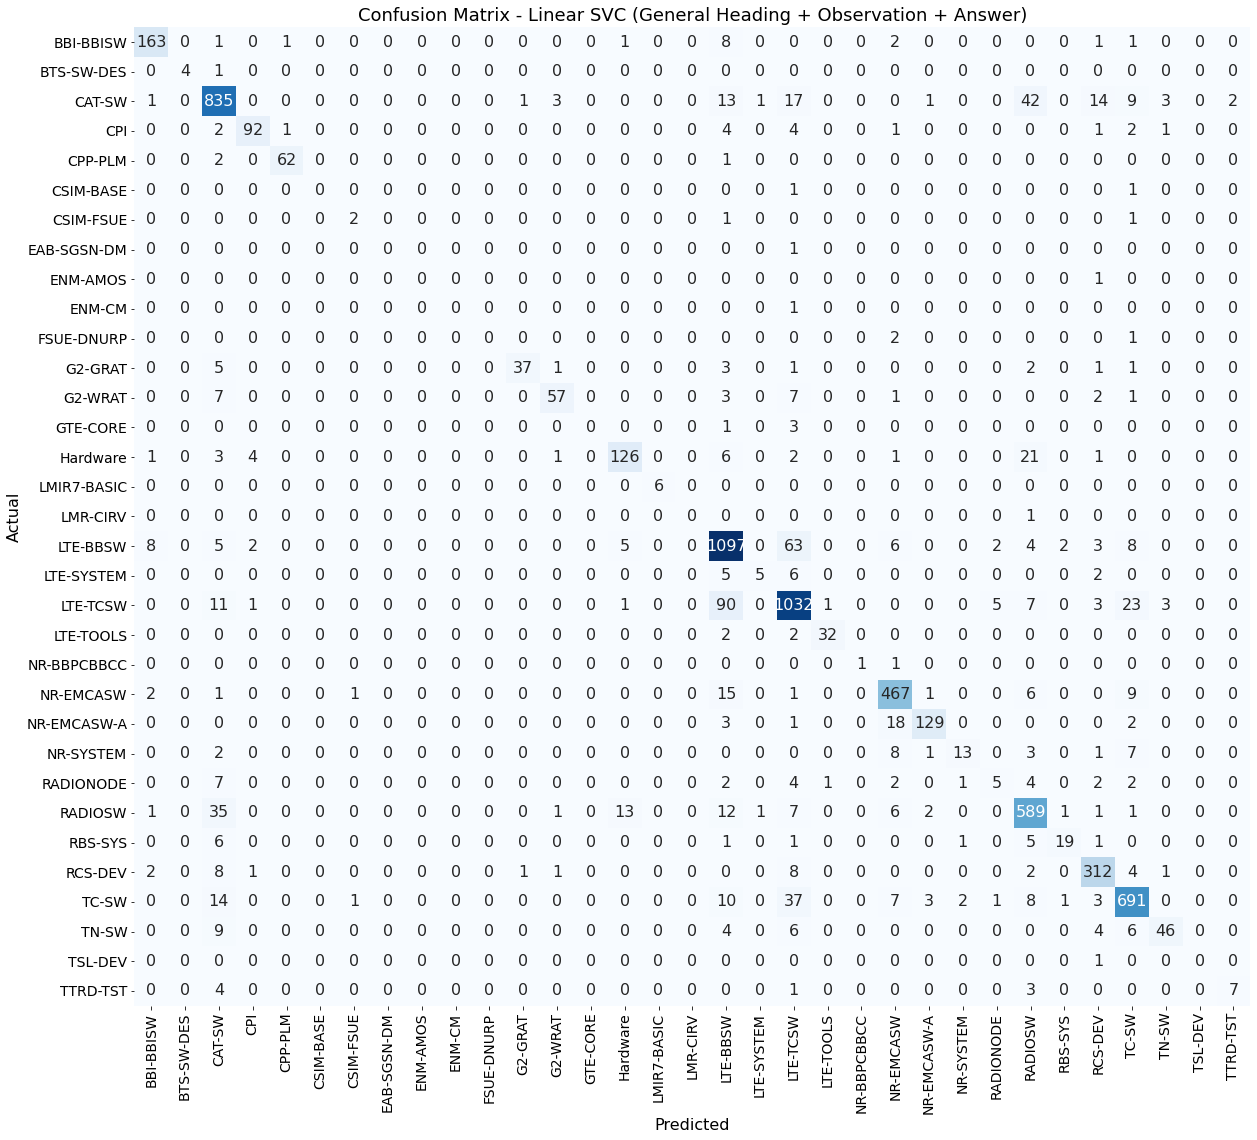

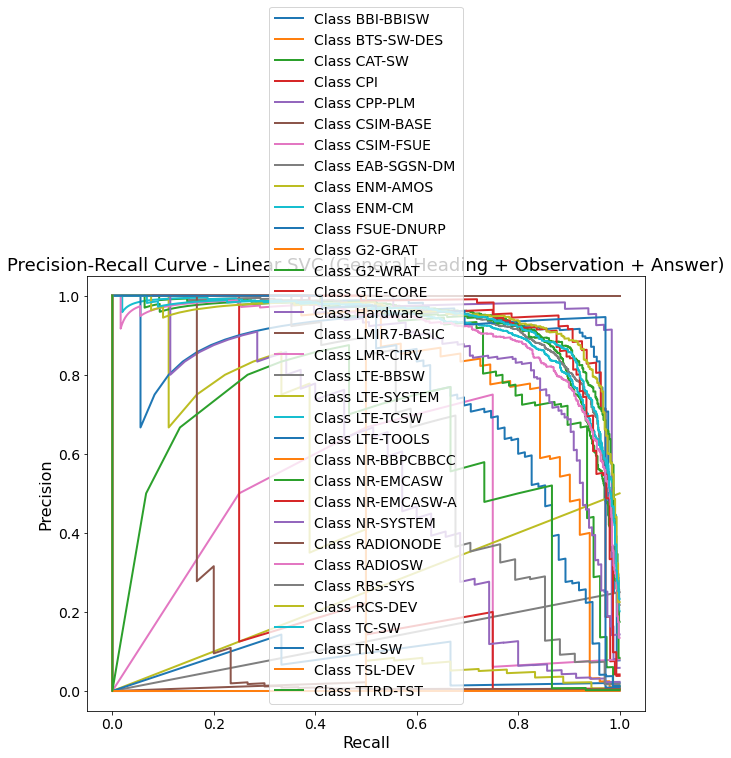

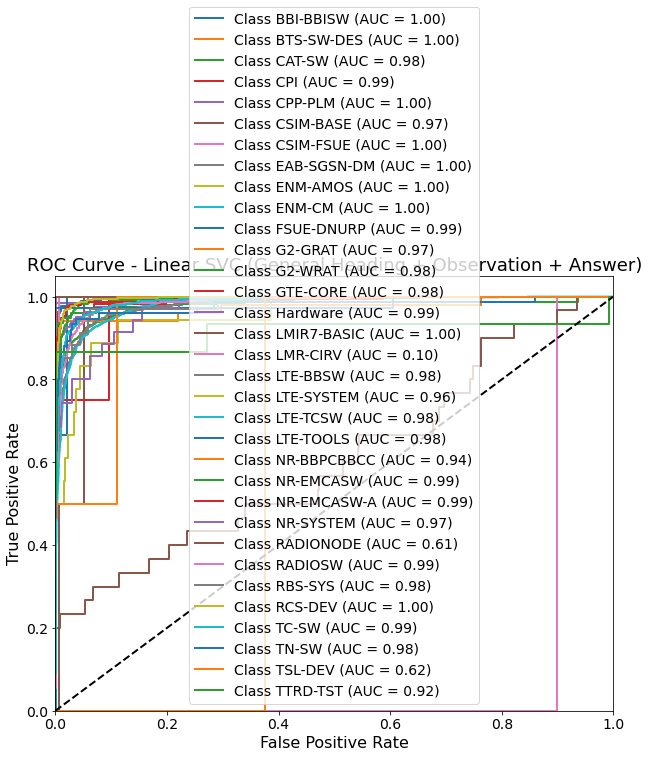

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from scipy import sparse
from sklearn.preprocessing import LabelEncoder

# Assuming X_combined, X_heading, X_observation, X_answer, and y are already defined
X_heading_observation_answer = sparse.hstack([X_heading, X_observation, X_answer])

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the KEY_MHO1 column
y = label_encoder.fit_transform(df_tr_features['KEY_MHO1'])

# Function to plot confusion matrix, precision-recall curve, and ROC curve
def plot_evaluation_metrics(model, X, y, description):
    # Train-test split with stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred_test = model.predict(X_test)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(20, 18))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, annot_kws={"size": 16})
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title(f'Confusion Matrix - Linear SVC ({description})', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    # Compute precision-recall curve and ROC curve
    y_test_binarized = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
    y_score = model.decision_function(X_test)

    # Precision-Recall Curve
    plt.figure(figsize=(10, 8))
    for i in range(y_test_binarized.shape[1]):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {label_encoder.classes_[i]}')
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.title(f'Precision-Recall Curve - Linear SVC ({description})', fontsize=18)
    plt.legend(loc="best", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 8))
    for i in range(y_test_binarized.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title(f'ROC Curve - Linear SVC ({description})', fontsize=18)
    plt.legend(loc="best", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Initialize the Linear SVC model
model = LinearSVC()

# Plot evaluation metrics for the desired feature combination
plot_evaluation_metrics(model, X_heading_observation_answer, y, "General Heading + Observation + Answer")


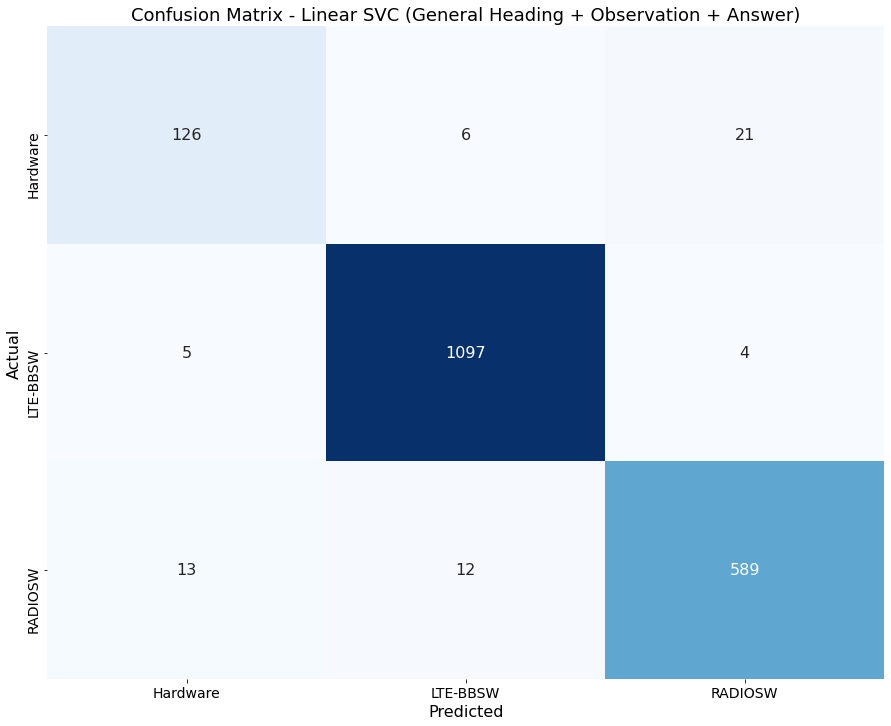

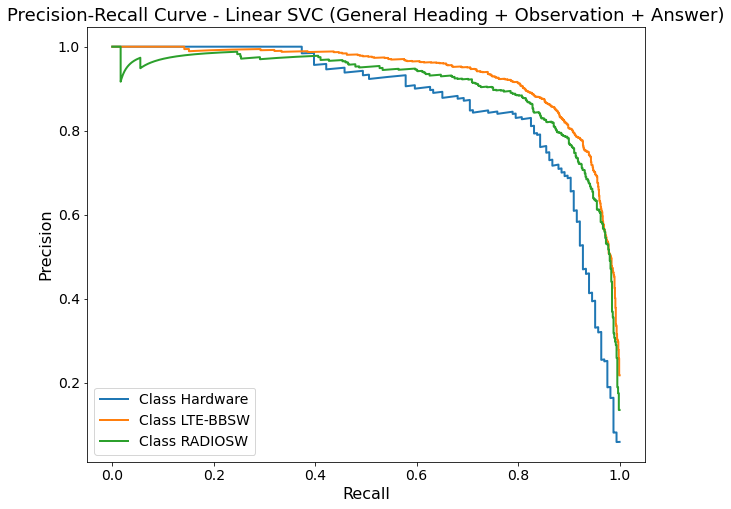

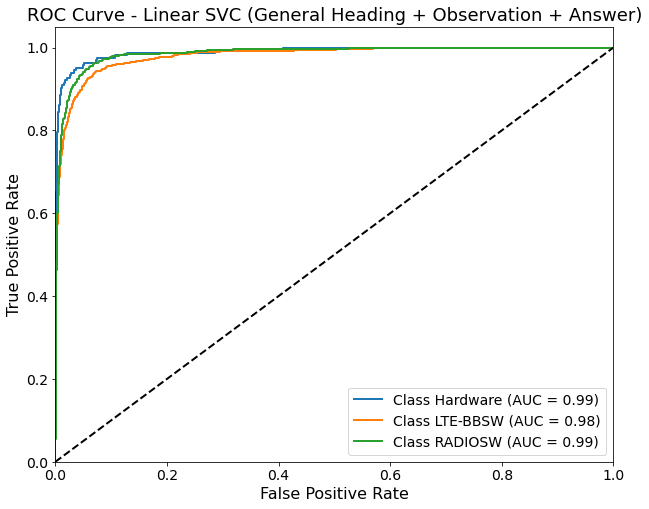

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from scipy import sparse
from sklearn.preprocessing import LabelEncoder

# Assuming X_combined, X_heading, X_observation, X_answer, and y are already defined
X_heading_observation_answer = sparse.hstack([X_heading, X_observation, X_answer])

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the KEY_MHO1 column
y = label_encoder.fit_transform(df_tr_features['KEY_MHO1'])

# Classes of interest
#classes_of_interest = ["Hardware", "LTE-BBSW", "LTE-TCSW", "CAT-SW", "RADIOSW", "NR-EMCASW"]
classes_of_interest = ["Hardware", "LTE-BBSW", "RADIOSW"]

# Indices of classes of interest
indices_of_interest = [list(label_encoder.classes_).index(cls) for cls in classes_of_interest]

# Function to plot confusion matrix, precision-recall curve, and ROC curve
def plot_evaluation_metrics(model, X, y, description):
    # Train-test split with stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred_test = model.predict(X_test)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    cm_filtered = cm[indices_of_interest][:, indices_of_interest]
    plt.figure(figsize=(15, 12))
    sns.heatmap(cm_filtered, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[label_encoder.classes_[i] for i in indices_of_interest], 
                yticklabels=[label_encoder.classes_[i] for i in indices_of_interest], 
                annot_kws={"size": 16})
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title(f'Confusion Matrix - Linear SVC ({description})', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    # Compute precision-recall curve and ROC curve
    y_test_binarized = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
    y_score = model.decision_function(X_test)

    # Precision-Recall Curve
    plt.figure(figsize=(10, 8))
    for i in indices_of_interest:
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {label_encoder.classes_[i]}')
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.title(f'Precision-Recall Curve - Linear SVC ({description})', fontsize=18)
    plt.legend(loc="best", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 8))
    for i in indices_of_interest:
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title(f'ROC Curve - Linear SVC ({description})', fontsize=18)
    plt.legend(loc="best", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Initialize the Linear SVC model
model = LinearSVC()

# Plot evaluation metrics for the desired feature combination
plot_evaluation_metrics(model, X_heading_observation_answer, y, "General Heading + Observation + Answer")



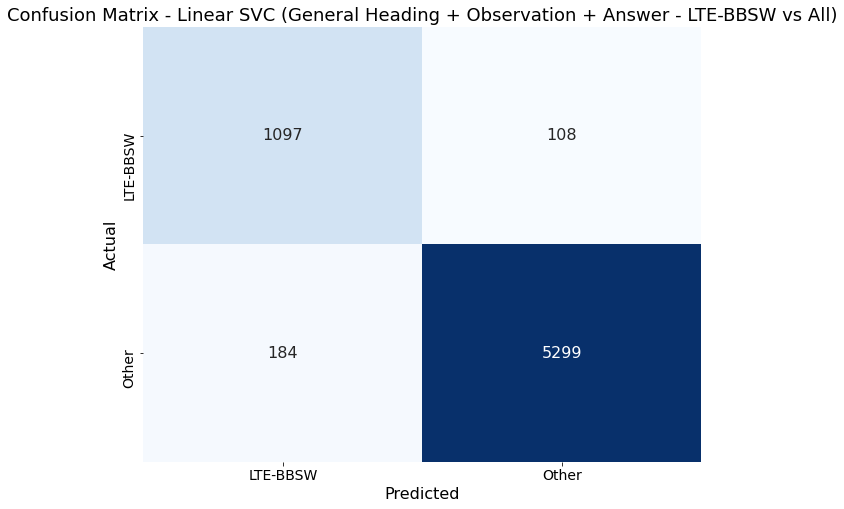

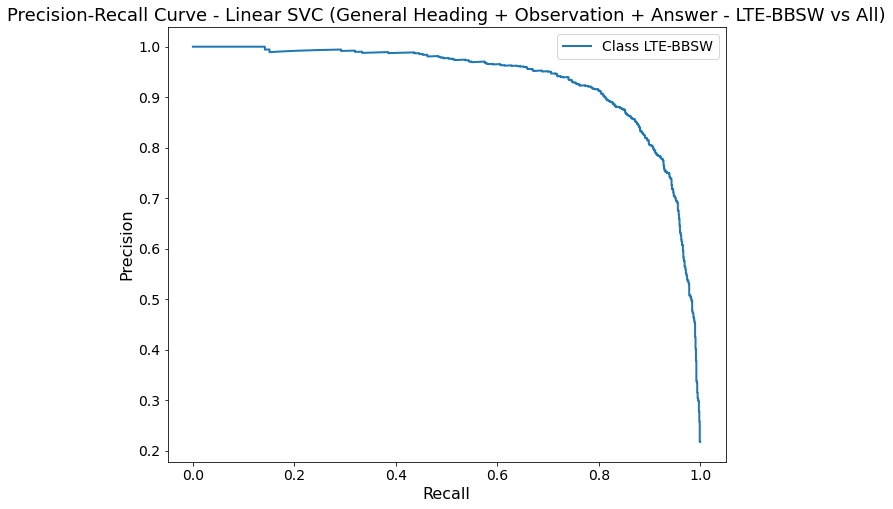

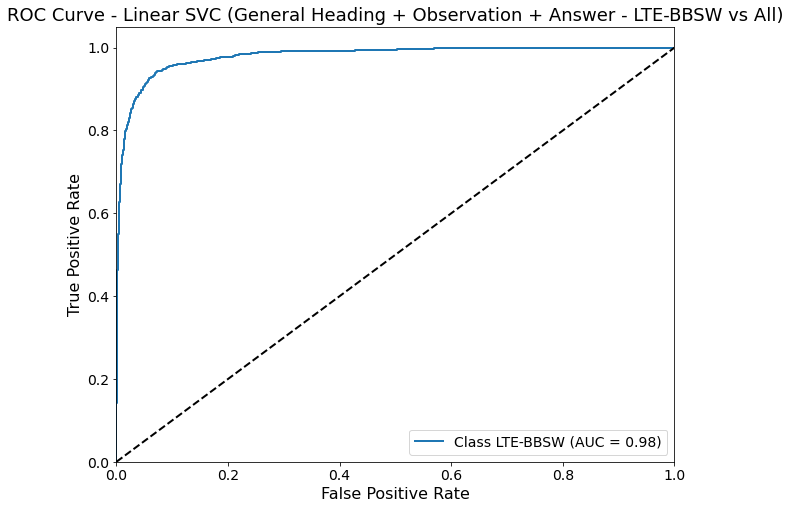

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from scipy import sparse
from sklearn.preprocessing import LabelEncoder
import numpy as np


X_heading_observation_answer = sparse.hstack([X_heading, X_observation, X_answer])

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the KEY_MHO1 column
y = label_encoder.fit_transform(df_tr_features['KEY_MHO1'])

# Function to plot confusion matrix, precision-recall curve, and ROC curve
def plot_evaluation_metrics(model, X, y, description, class_of_interest):
    # Train-test split with stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred_test = model.predict(X_test)
    
    # Update labels for binary classification
    y_test_binary = np.where(y_test == class_of_interest, 1, 0)
    y_pred_test_binary = np.where(y_pred_test == class_of_interest, 1, 0)

    # Plot confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred_test_binary, labels=[1, 0])
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[label_encoder.classes_[class_of_interest], 'Other'], 
                yticklabels=[label_encoder.classes_[class_of_interest], 'Other'], 
                annot_kws={"size": 16})
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title(f'Confusion Matrix - Linear SVC ({description})', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    # Compute precision-recall curve and ROC curve for the class of interest
    y_score = model.decision_function(X_test)

    # Extract the relevant scores for the class of interest
    y_score_binary = y_score if y_score.ndim == 1 else y_score[:, class_of_interest]

    # Precision-Recall Curve
    plt.figure(figsize=(10, 8))
    precision, recall, _ = precision_recall_curve(y_test_binary, y_score_binary)
    plt.plot(recall, precision, lw=2, label=f'Class {label_encoder.classes_[class_of_interest]}')
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.title(f'Precision-Recall Curve - Linear SVC ({description})', fontsize=18)
    plt.legend(loc="best", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 8))
    fpr, tpr, _ = roc_curve(y_test_binary, y_score_binary)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[class_of_interest]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title(f'ROC Curve - Linear SVC ({description})', fontsize=18)
    plt.legend(loc="best", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Initialize the Linear SVC model
model = LinearSVC()

# Plot evaluation metrics for "LTE-BBSW" vs. all other classes
class_of_interest = list(label_encoder.classes_).index("LTE-BBSW")
plot_evaluation_metrics(model, X_heading_observation_answer, y, "General Heading + Observation + Answer - LTE-BBSW vs All", class_of_interest)


In [2]:
############# K-Means Clustering #########################################
#########################################################################
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from scipy import sparse
import numpy as np


# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the KEY_MHO column
y = label_encoder.fit_transform(df_tr_features['KEY_MHO1'])

# Function to evaluate K-Means clustering
def evaluate_kmeans(X, n_clusters=20):
    # Initialize KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=51)
    
    # Fit K-Means clustering
    kmeans.fit(X.toarray())  # Assuming X is in sparse matrix format
    
    # Evaluate clustering performance (inertia)
    inertia = kmeans.inertia_
    return inertia

# Evaluate K-Means clustering with different input feature combinations
print("Evaluating K-Means Clustering")
print("=============================")

# Combined text features
inertia_combined = evaluate_kmeans(X_combined)
print("Input Features: Combined Text")
print(f"K-Means Clustering Inertia: {inertia_combined}")
print()

# General Heading + Observation features
X_heading_observation = sparse.hstack([X_heading, X_observation])
inertia_heading_observation = evaluate_kmeans(X_heading_observation)
print("Input Features: General Heading + Observation")
print(f"K-Means Clustering Inertia: {inertia_heading_observation}")
print()

# General Heading + Observation + Answer features
X_heading_observation_answer = sparse.hstack([X_heading, X_observation, X_answer])
inertia_heading_observation_answer = evaluate_kmeans(X_heading_observation_answer)
print("Input Features: General Heading + Observation + Answer")
print(f"K-Means Clustering Inertia: {inertia_heading_observation_answer}")
print()


NameError: name 'df_tr_features' is not defined

In [ ]:
############################# adaboost independently as it will take long time to execute #####################
################################################################################################################
########################################### number of estimators 50000 and learning rate 0.2 ################

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy import sparse
import numpy as np

# Assuming you have already defined X_combined, X_heading, X_observation, X_answer

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the KEY_MHO1 column
y = label_encoder.fit_transform(df_tr_features['KEY_MHO1'])

# Models to evaluate
models = {
    "Adaboost": AdaBoostClassifier(n_estimators=50000, learning_rate=0.2)  # Example hyperparameters
}

# Function to train and evaluate models
def train_and_evaluate(X, y, model):
    # Train-test split with stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred_test = model.predict(X_test)
    
    # Predictions on train set
    y_pred_train = model.predict(X_train)
    
    # Accuracy on test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    # Accuracy on train set
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    # Classification report
    report = classification_report(y_test, y_pred_test, target_names=label_encoder.classes_)
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    
    return accuracy_train, accuracy_test, np.mean(cv_scores), np.std(cv_scores), report

# Concatenate sparse matrices horizontally
X_heading_observation = sparse.hstack([X_heading, X_observation])
X_heading_observation_answer = sparse.hstack([X_heading, X_observation, X_answer])

# Iterate over models and input feature combinations
for model_name, model in models.items():
    print(f"Model: {model_name}")
    print("=====================")
    
    # Evaluate classification models with different input feature combinations
    for X, description in [(X_combined, "Combined Text"),
                           (X_heading_observation, "General Heading + Observation"),
                           (X_heading_observation_answer, "General Heading + Observation + Answer")]:
        accuracy_train, accuracy_test, cv_mean, cv_std, report = train_and_evaluate(X, y, model)
        print(f"Input Features: {description}")
        print(f"Train Accuracy: {accuracy_train:.4f}")
        print(f"Test Accuracy: {accuracy_test:.4f}")
        print(f"Cross-validation Mean Accuracy: {cv_mean:.4f} ± {cv_std:.4f}")
        print("Classification Report:")
        print(report)
        print()


In [93]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15605, 805645) (15605,) (6688, 805645) (6688,)
